#**Kitasabi.com (Kelompok 5)**


*   M Choiril Iman
*   Yehezkiel Novianto

*   Ahmad Reza
*   Celestial Randy


*   Risca Naquitasia
*   Sonia Epifany Sandah

*   Oky Hariawan






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix, recall_score, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 22, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('hotel_booking.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# initialize df_clean
df_clean = df.copy()

In [ ]:
#Numeric
numerical = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()

#Categorical
categorical = df_clean.loc[:, (df_clean.dtypes != int) & (df_clean.dtypes != float)].columns.tolist()

In [ ]:
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

# **Stage 1 - EDA**

## **Descriptive Stats**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Statistical summary numeric data
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Insight:
1. Ada beberapa kolom yang kosong atau memiliki null value seperti children, country, agent, company. 
2. Ada tipe data yang tidak sesuai yaitu children, agent, dan company yaitu float64 harusnya int64 (reservation_status_date yang dapat dijadikan datetime)
3. Tidak ditemukan data yang duplikat
4. Beberapa kolom previous_cancellations, previous_bookings_not_canceled, booking_changes days_in_waiting_list, required_car_parking_spaces, total_of_special_requests hanya memiliki maximum value (Q4). (IQR) interquartile nya tidak menyebar, hanya di Q4 saja, Hal ini menunjukan bahwa kolom ini hanya berkontribusi pembatalan booking hanya pada beberapa kasus saja.
data bagus jika menyebar di Q2-Q3 (besar box ditengah))

In [ ]:
#Statistical summary category data
df.describe(include='object')

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  \
count        119390        119390             119390                  119390   
unique            3             4                  3                     926   
top      No Deposit     Transient          Check-Out              2015-10-21   
freq         104641         89613              75166                    1461   

                   name                email  phone-number       credit_card  
count            119390               119390        119390            119390  
unique            81503               115889        119390              9000  
top     Michael Johnson  Michael.C@gmail.com  669-792-1661  ************4923  
freq                 48                    6             1                28

In [ ]:
df['is_canceled']=df['is_canceled'].astype(str)
df['is_repeated_guest']=df['is_repeated_guest'].astype(str)

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
numerical = [column for column in df.columns if (df[column].dtype=='int64')|(df[column].dtype=='float64')]
categorical = [column for column in df.columns if (df[column].dtype=='object')]

In [ ]:
numerical

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
categorical

['hotel',
 'is_canceled',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

## **Univariate Analysis**

### **Box plots**

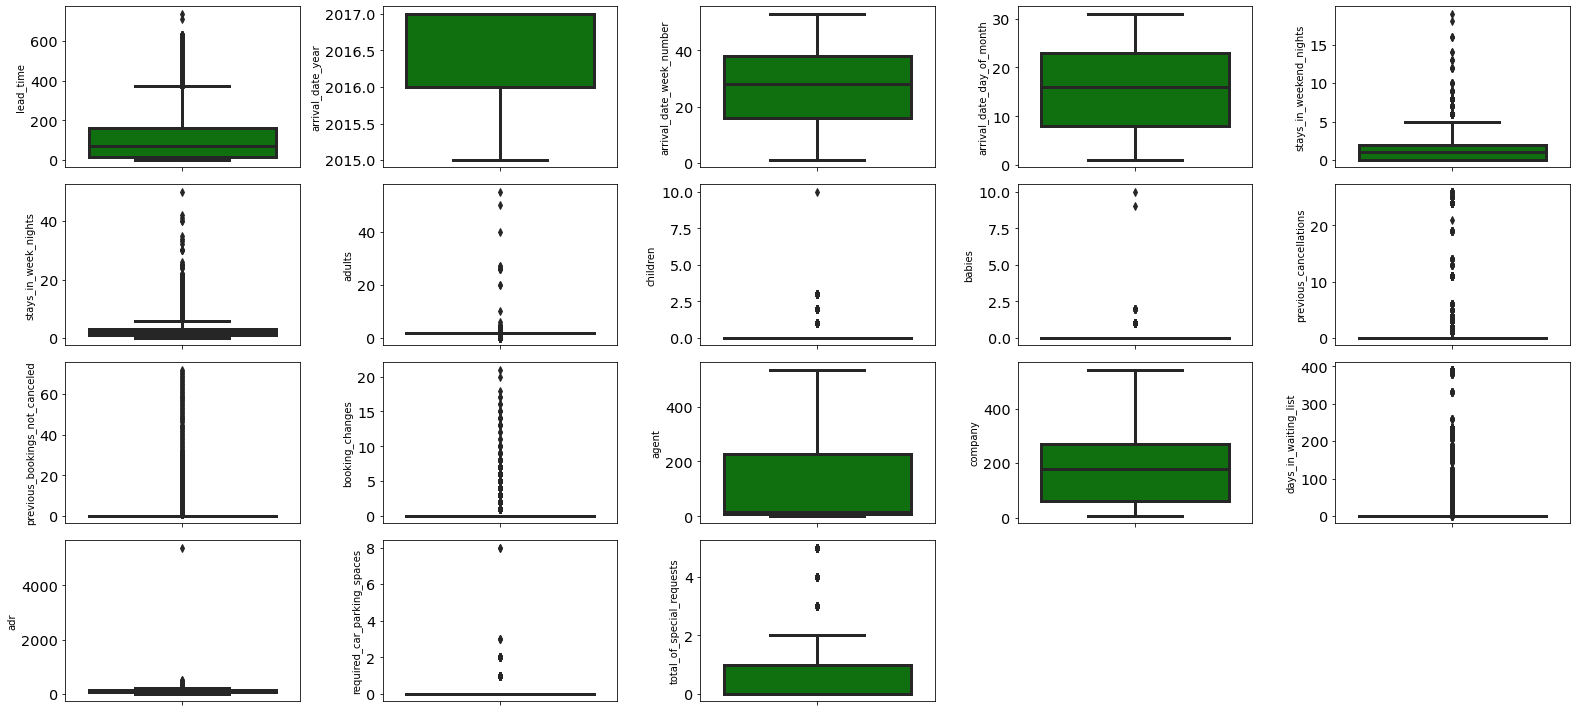

In [ ]:
features = numerical
for i in range(0, len(features)):
        plt.subplot(4, 5, i+1)
        sns.boxplot(y=df[features[i]], color='green', orient='v')
        plt.tight_layout()

Pengamatan :
1. Terlihat adanya outlier pada banyak kolom, yaitu 'lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',</br>'previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr,'required_car_parking_spaces','total_of_special_requests'.
2. Pada boxplot terlihat ada terdapat banyak kolom yang kemungkinan skewed yaitu semua kolom kecuali 'is_canceled','arrival_date_week_number','arrival_date_day_of_month','is_repeated_guest'

### **Distribution plots**

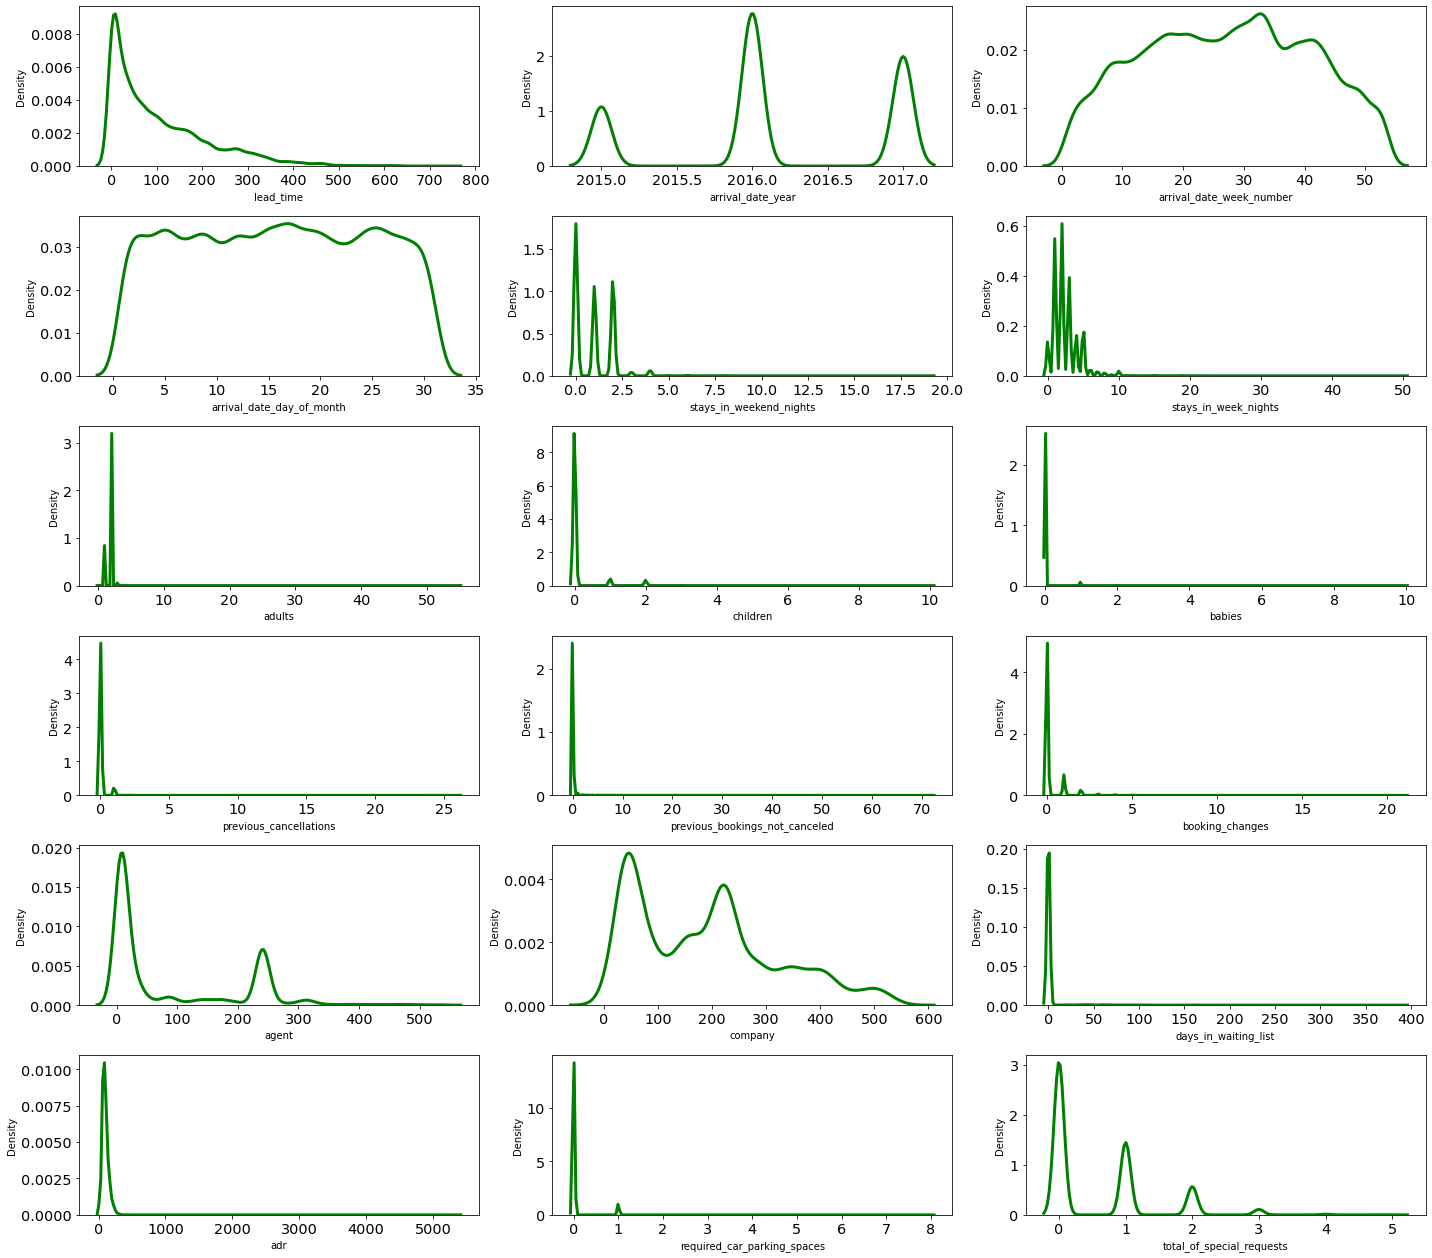

In [ ]:
features = numerical
plt.figure(figsize=(20, 20))
for i in range(0, len(features)):
   
        plt.subplot(7, 3, i+1)
        sns.kdeplot(x=df[features[i]], color='green')
        plt.xlabel(features[i])
        plt.tight_layout()

Pengamatan : 
1. Seperti dugaan ketika melihat boxplot, hampir semua kemungkinan skewed kecuali 'is_canceled','arrival_date_week_number','arrival_date_day_of_month','is_repeated_guest'. Berarti ada kemungkinan  kita perlu melakukan sesuatu pada kolom-kolom tersebut nantinya.
2. Ada 2 kolom yang terlihat mendekati normal yaitu 'arrival_date_week_number' dan 'arrival_date_day_of_month'.


In [ ]:
# Mencari nilai skew untuk memastikan dugaan skew pada visualisasi box plot dan kde plot di atas
df[numerical].skew()

lead_time                          1.346550
arrival_date_year                 -0.232583
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
adults                            18.317805
children                           4.112590
babies                            24.646545
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.089386
company                            0.601600
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
dtype: float64

1. Dari hasil di atas terlihat bahwa tidak ada yang berdistribusi normal (distribusi normal : skew = 0).
2. Hampir semua kolom skew, baik positively maupun negatively skew, kecuali 'arrival date week number' dan 'arrival date day of month'.
3. Ada 2 kolom yang mendekati distribusi normal yaitu 'arrival date week number' dan 'arrival date day of month'.
4. Sehingga dugaan pada pengamatan boxplot dan kde plot terkait skew sudah terbukti.

### **Individual Count Plot (Categorical)**

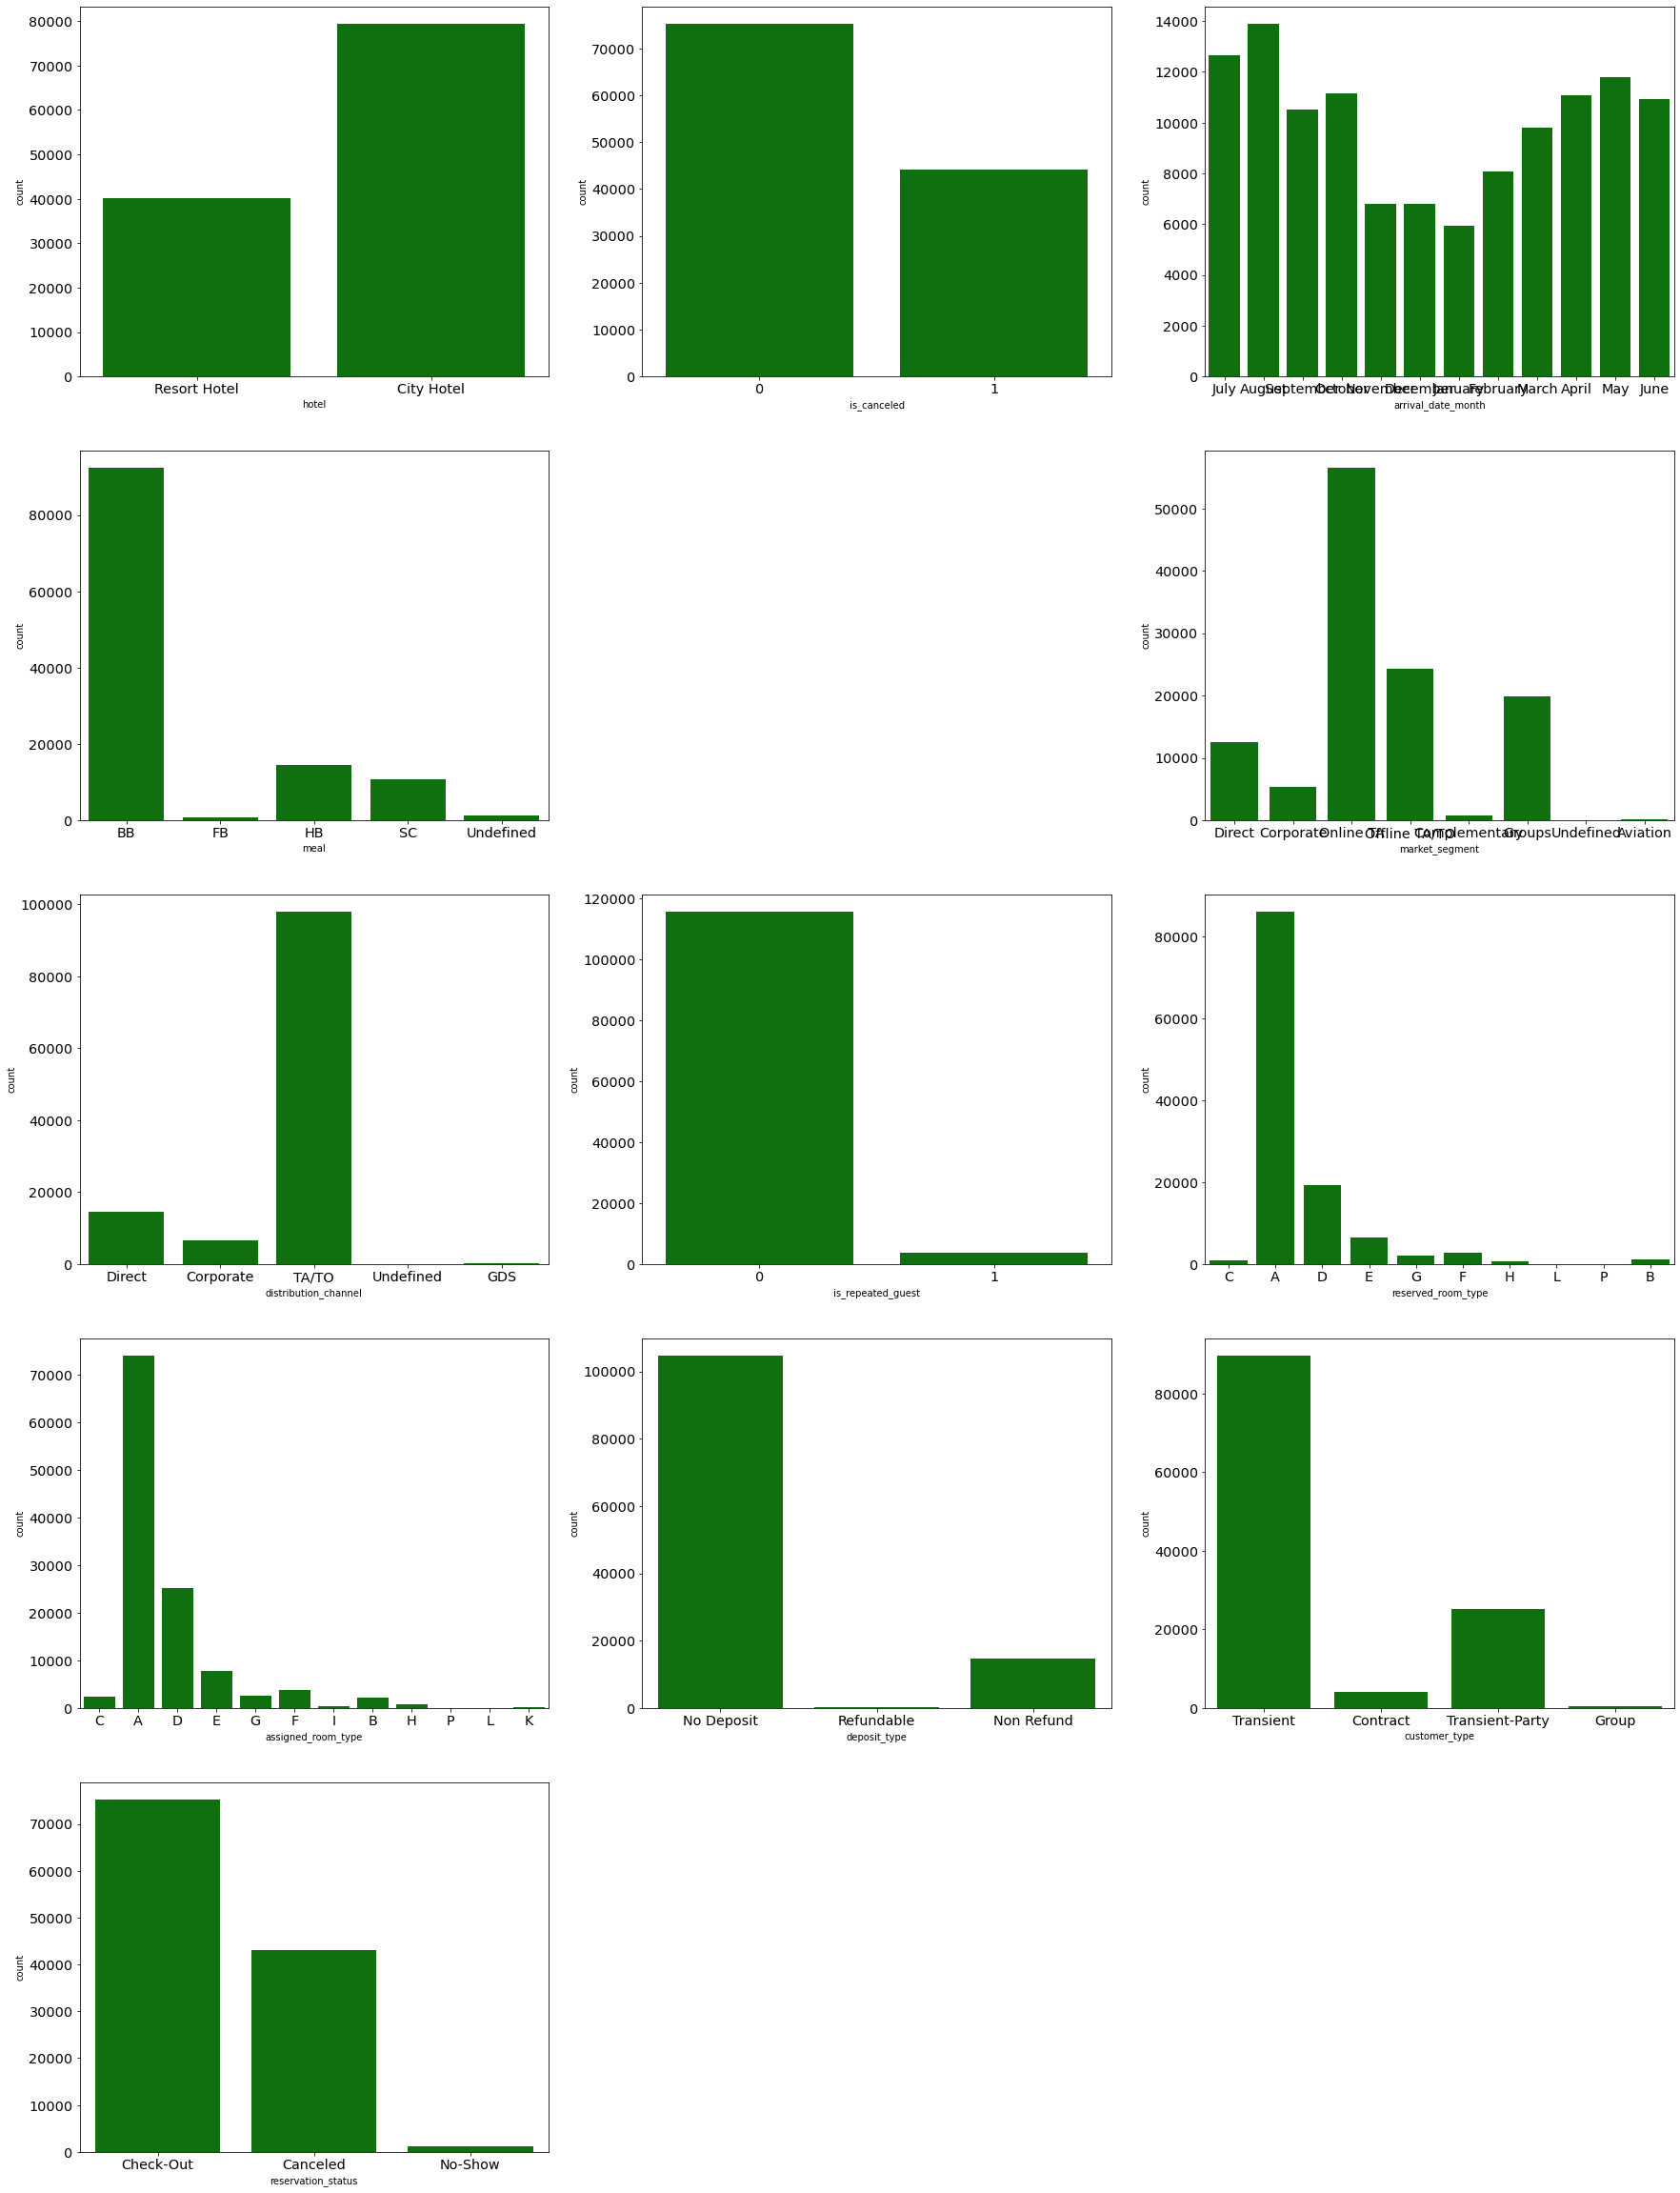

In [ ]:
features = categorical
plt.figure(figsize=(30,50))
for i in range(0, len(features)):
    if i == 4 or  i == 13 or i == 14  or i == 15 or i == 16 or i==17:
        continue
    else:
        plt.subplot(6,3 , i+1)
        sns.countplot(x=df[features[i]], color='green')

Hasil dari pengamatan di atas di dapat kesimpulan antara lain hampir semua feature categorical terjadi ketimpangan yang cukup tinggi antara lain 
1. Hotel = Perbedaan city hotel dan resort hotel mencapai 50%
2. Arrival date month = Pada bulan November - Januari mengalami penurunan yg signifikan dibanding bulan sebelumnya
3. Meal = BB (Bed and Breakfast) sangat berbeda jauh dengan HB (Breakfast and Dinner, SC (Self Catering) dan FB (Breakfast, lunch and dinner)
4. Market_Segment = Market Segment berbeda jauh dengan offline
5. Distribution_Channel = Via TA/TO (Travel Agent, Tour Operator) sangat jauh perbedaannya dengan distribution channel lainnya
6. reserved_room_type = type A sangat berbeda jauh dengan type lain (terdekat perbedaan lebih dari 4 kali
7. assigned_room_type = sama seperti no 6 akan tetapi gap nya semakin kecil karena beberapa type mengalami peningkatan (G, E, D, F, B)
8. Deposit type = No deposit masih tinggi penggunaannya dibanding dengan non refund atau refundable
9. customer type = Transient dengan customer type lain berbeda sangat jauh

In [ ]:
def country(x):
    if x['country'] == 'PRT':
        country = 'PRT'
    elif x['country'] == 'GBR':
        country = 'GBR'
    elif x['country'] == 'FRA':
        country = 'FRA'
    elif x['country'] == 'ESP':
        country = 'ESP'
    else :
        country = 'Others'
    return country

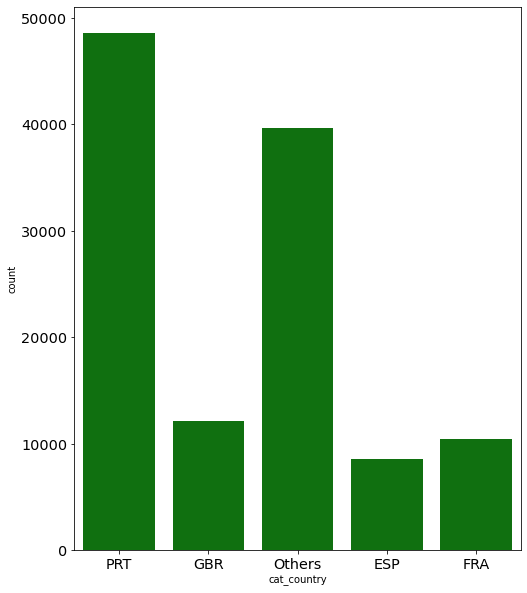

In [ ]:
df['cat_country'] = df.apply(lambda x : country(x), axis = 1)
plt.figure(figsize=(8,10))
sns.countplot(x=df['cat_country'], color='green')

10. Untuk features country juga memiliki nilai timpang dimana teringgi adalah turis dari PRT(Portugal) jauh lebih banyak dari country lainnya

## **Multivariate Analysis**

### **Heatmap correlation**

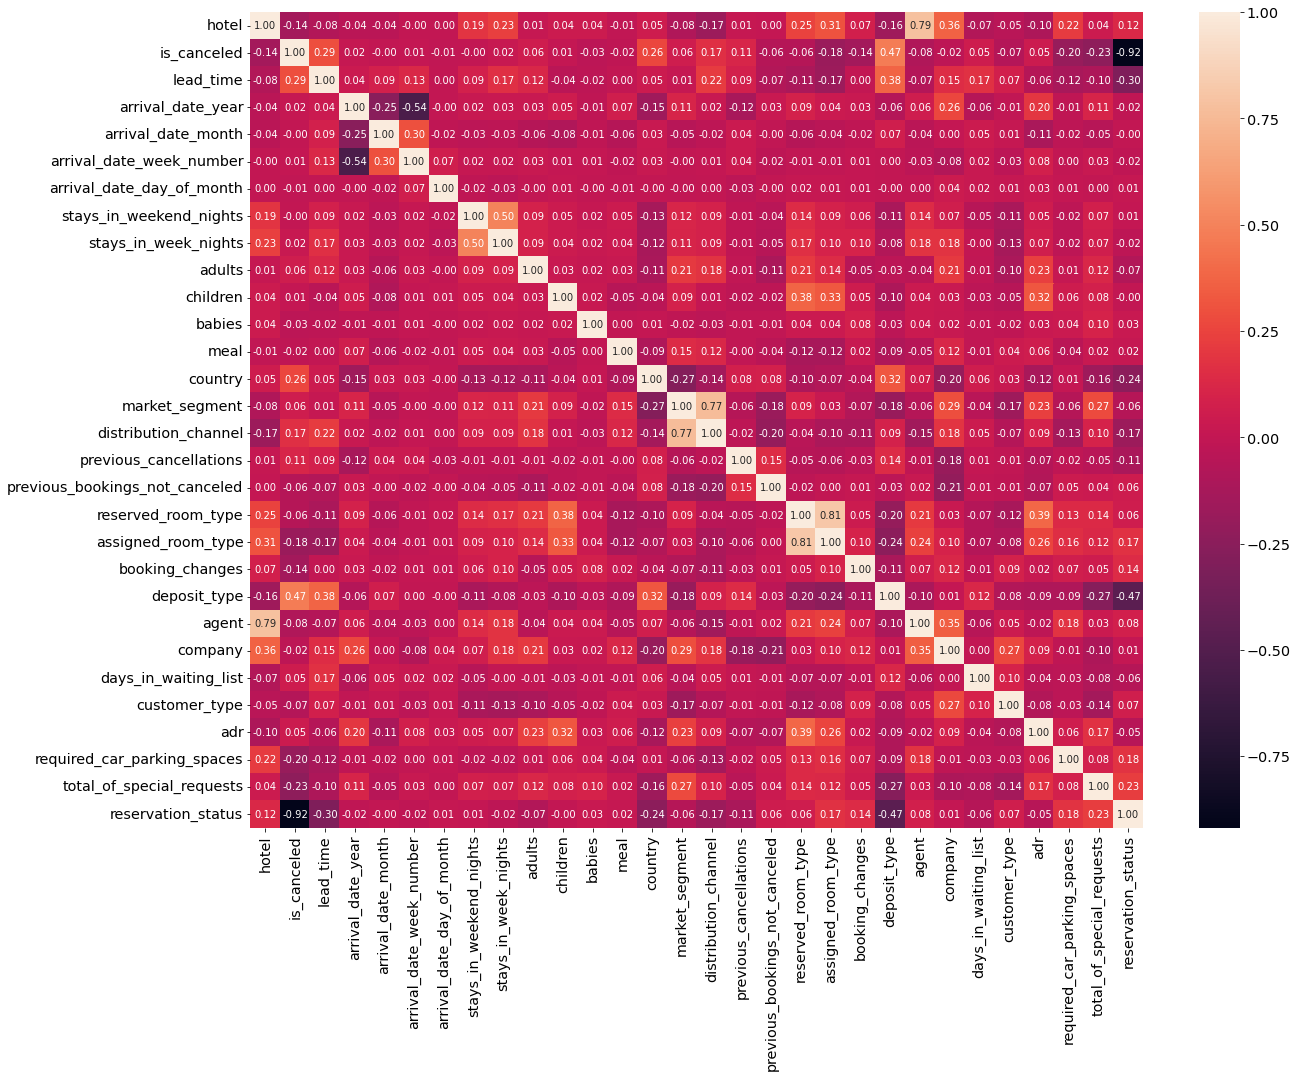

In [ ]:
#Heatmap correlation
df_clean = df.copy()
le = LabelEncoder()

categorical = [
    'is_canceled',
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'reservation_status',
]
# Columns name, email, phone-number, credit_card appear to have a large number of unique values. There is a possibility that it is not very useful for analysis

for col in categorical:
    df_clean[col] = le.fit_transform(df_clean[col])
plt.figure(figsize=(20, 15))
sns.heatmap(df_clean.corr(), annot=True, fmt='.2f');

**From the Correlation Heatmap above, it can be seen that:**

*   Kolom "*market_segment & distribution_channel*" memiliki korelasi positif yang kuat sebesar 0.77. Kemungkinan redundan dan hanya menggunakan salah satunya
*   Kolom "*agent & hotel*" memiliki korelasi positif yang kuat sebesar 0.79. Kemungkinan tidak digunakan karena tidak memiliki korelasi dengan target "*is_cancelled*"
*   Kolom "*reserved_room_type and assigned_room_type*" juga memiliki korelasi positif yang sangat kuat dengan berat 0.81. Kemungkinan tidak digunakan karena tidak memiliki korelasi dengan target "*is_cancelled*"

In [ ]:
df['is_canceled']=df['is_canceled'].astype(int)

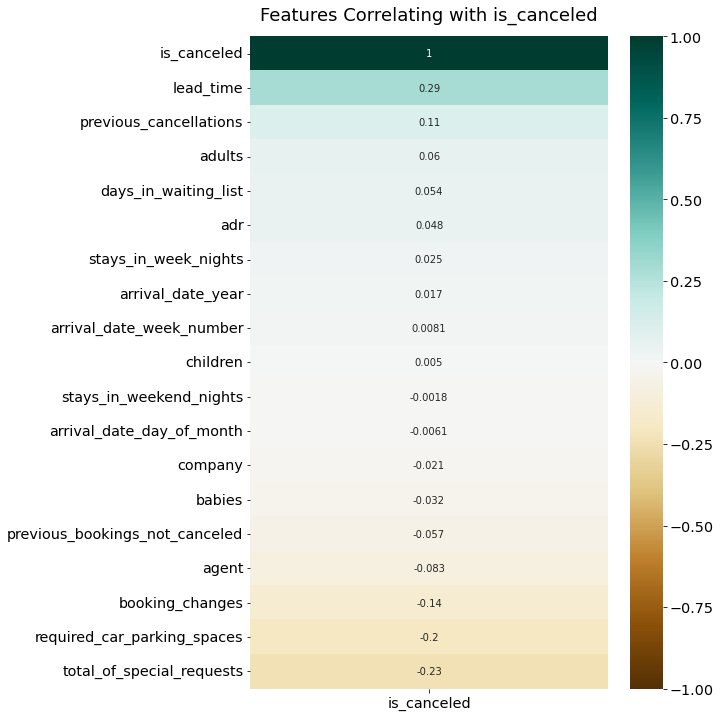

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with is_canceled', fontdict={'fontsize':18}, pad=16);

**From the Correlation Heatmap above, it can be seen that:**
*   Target adalah "*is_cancelled*" yang menandakan status pembatalan pesanan
*   "is_cancelled" sangat jelas memiliki korelasi negatif yang sangat kuat terhadap "reservation_status" dengan berat -0.92
*   "is_cancelled" memiliki korelasi positif yang rendah terhadap lead_time, & country dirange 0,20 – 0,3999
*   "is_cancelled" memiliki korelasi positif yang sedang terhadap deposit_type dengan berat 0,47


### **Pair plot**

warning: run nya sedikit lama (+- 35 menit)

In [ ]:
df_pair = df[numerical]
df_pair.loc[:,'is_canceled'] = df.loc[:,['is_canceled']]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<Figure size 1080x1080 with 0 Axes>

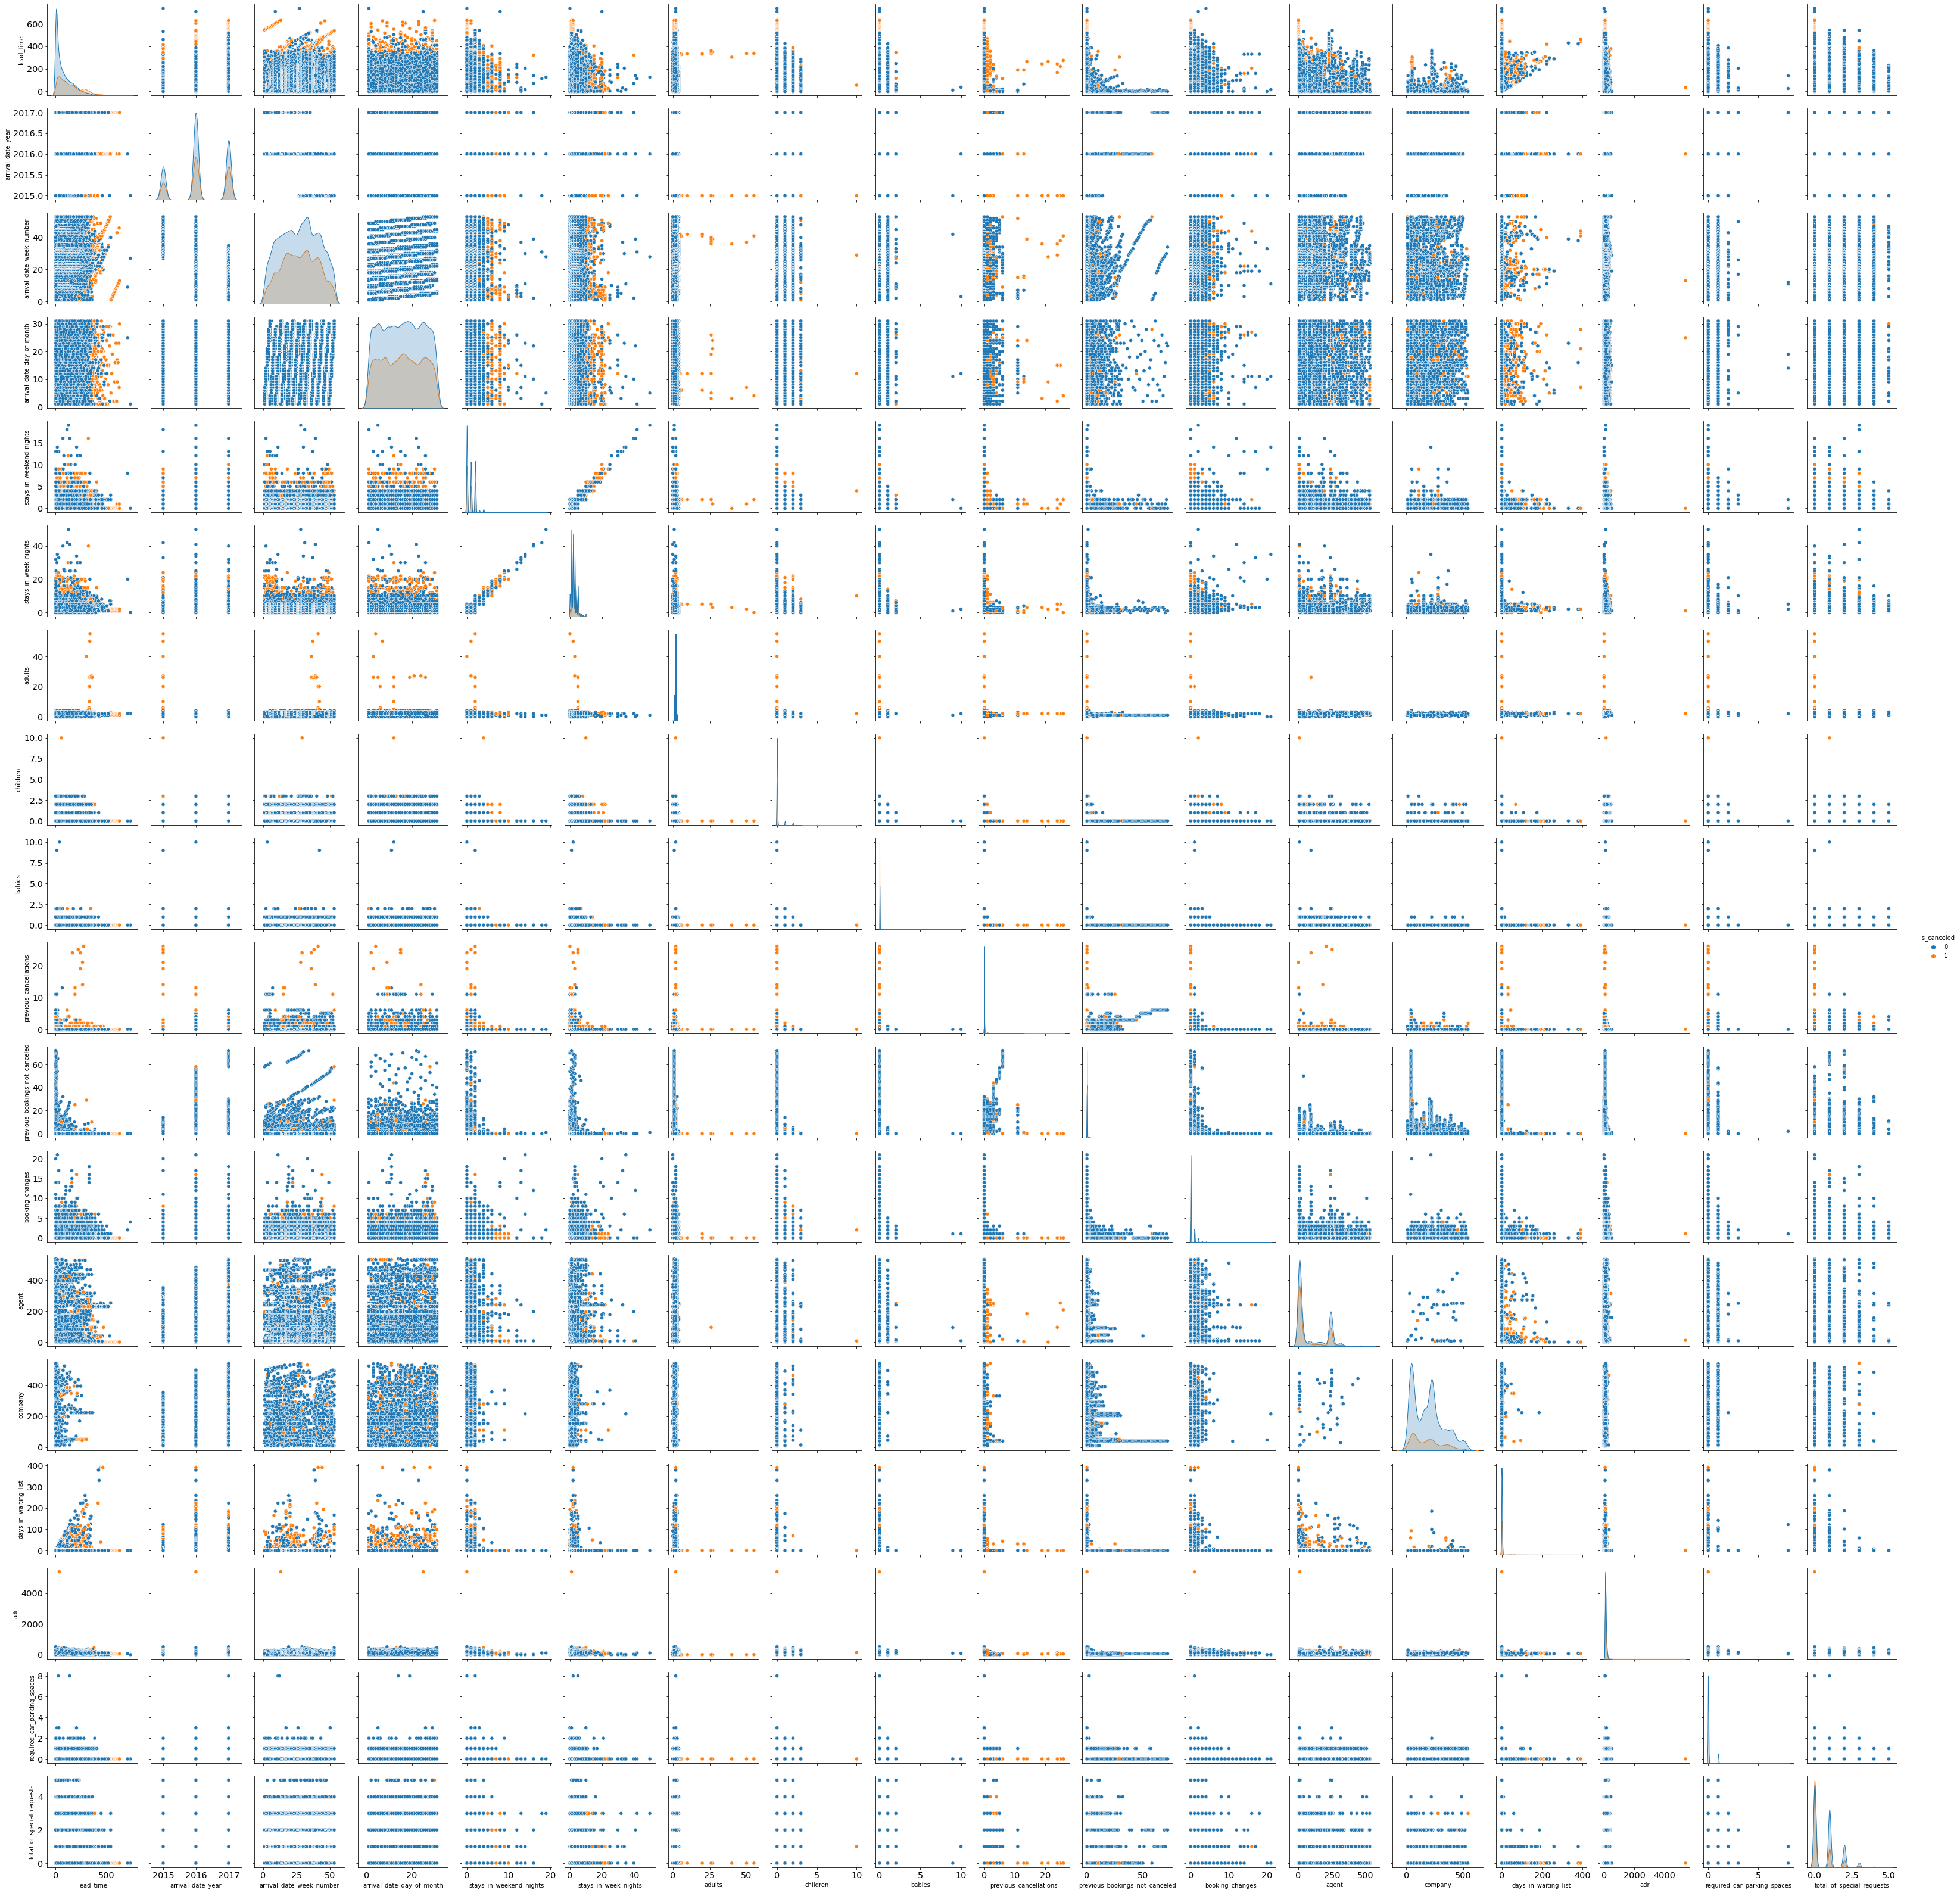

In [ ]:
#Pair Plot 
plt.figure(figsize=(15, 15))
sns.pairplot(df_pair, diag_kind='kde', hue='is_canceled')
plt.show()

<Figure size 1080x1080 with 0 Axes>

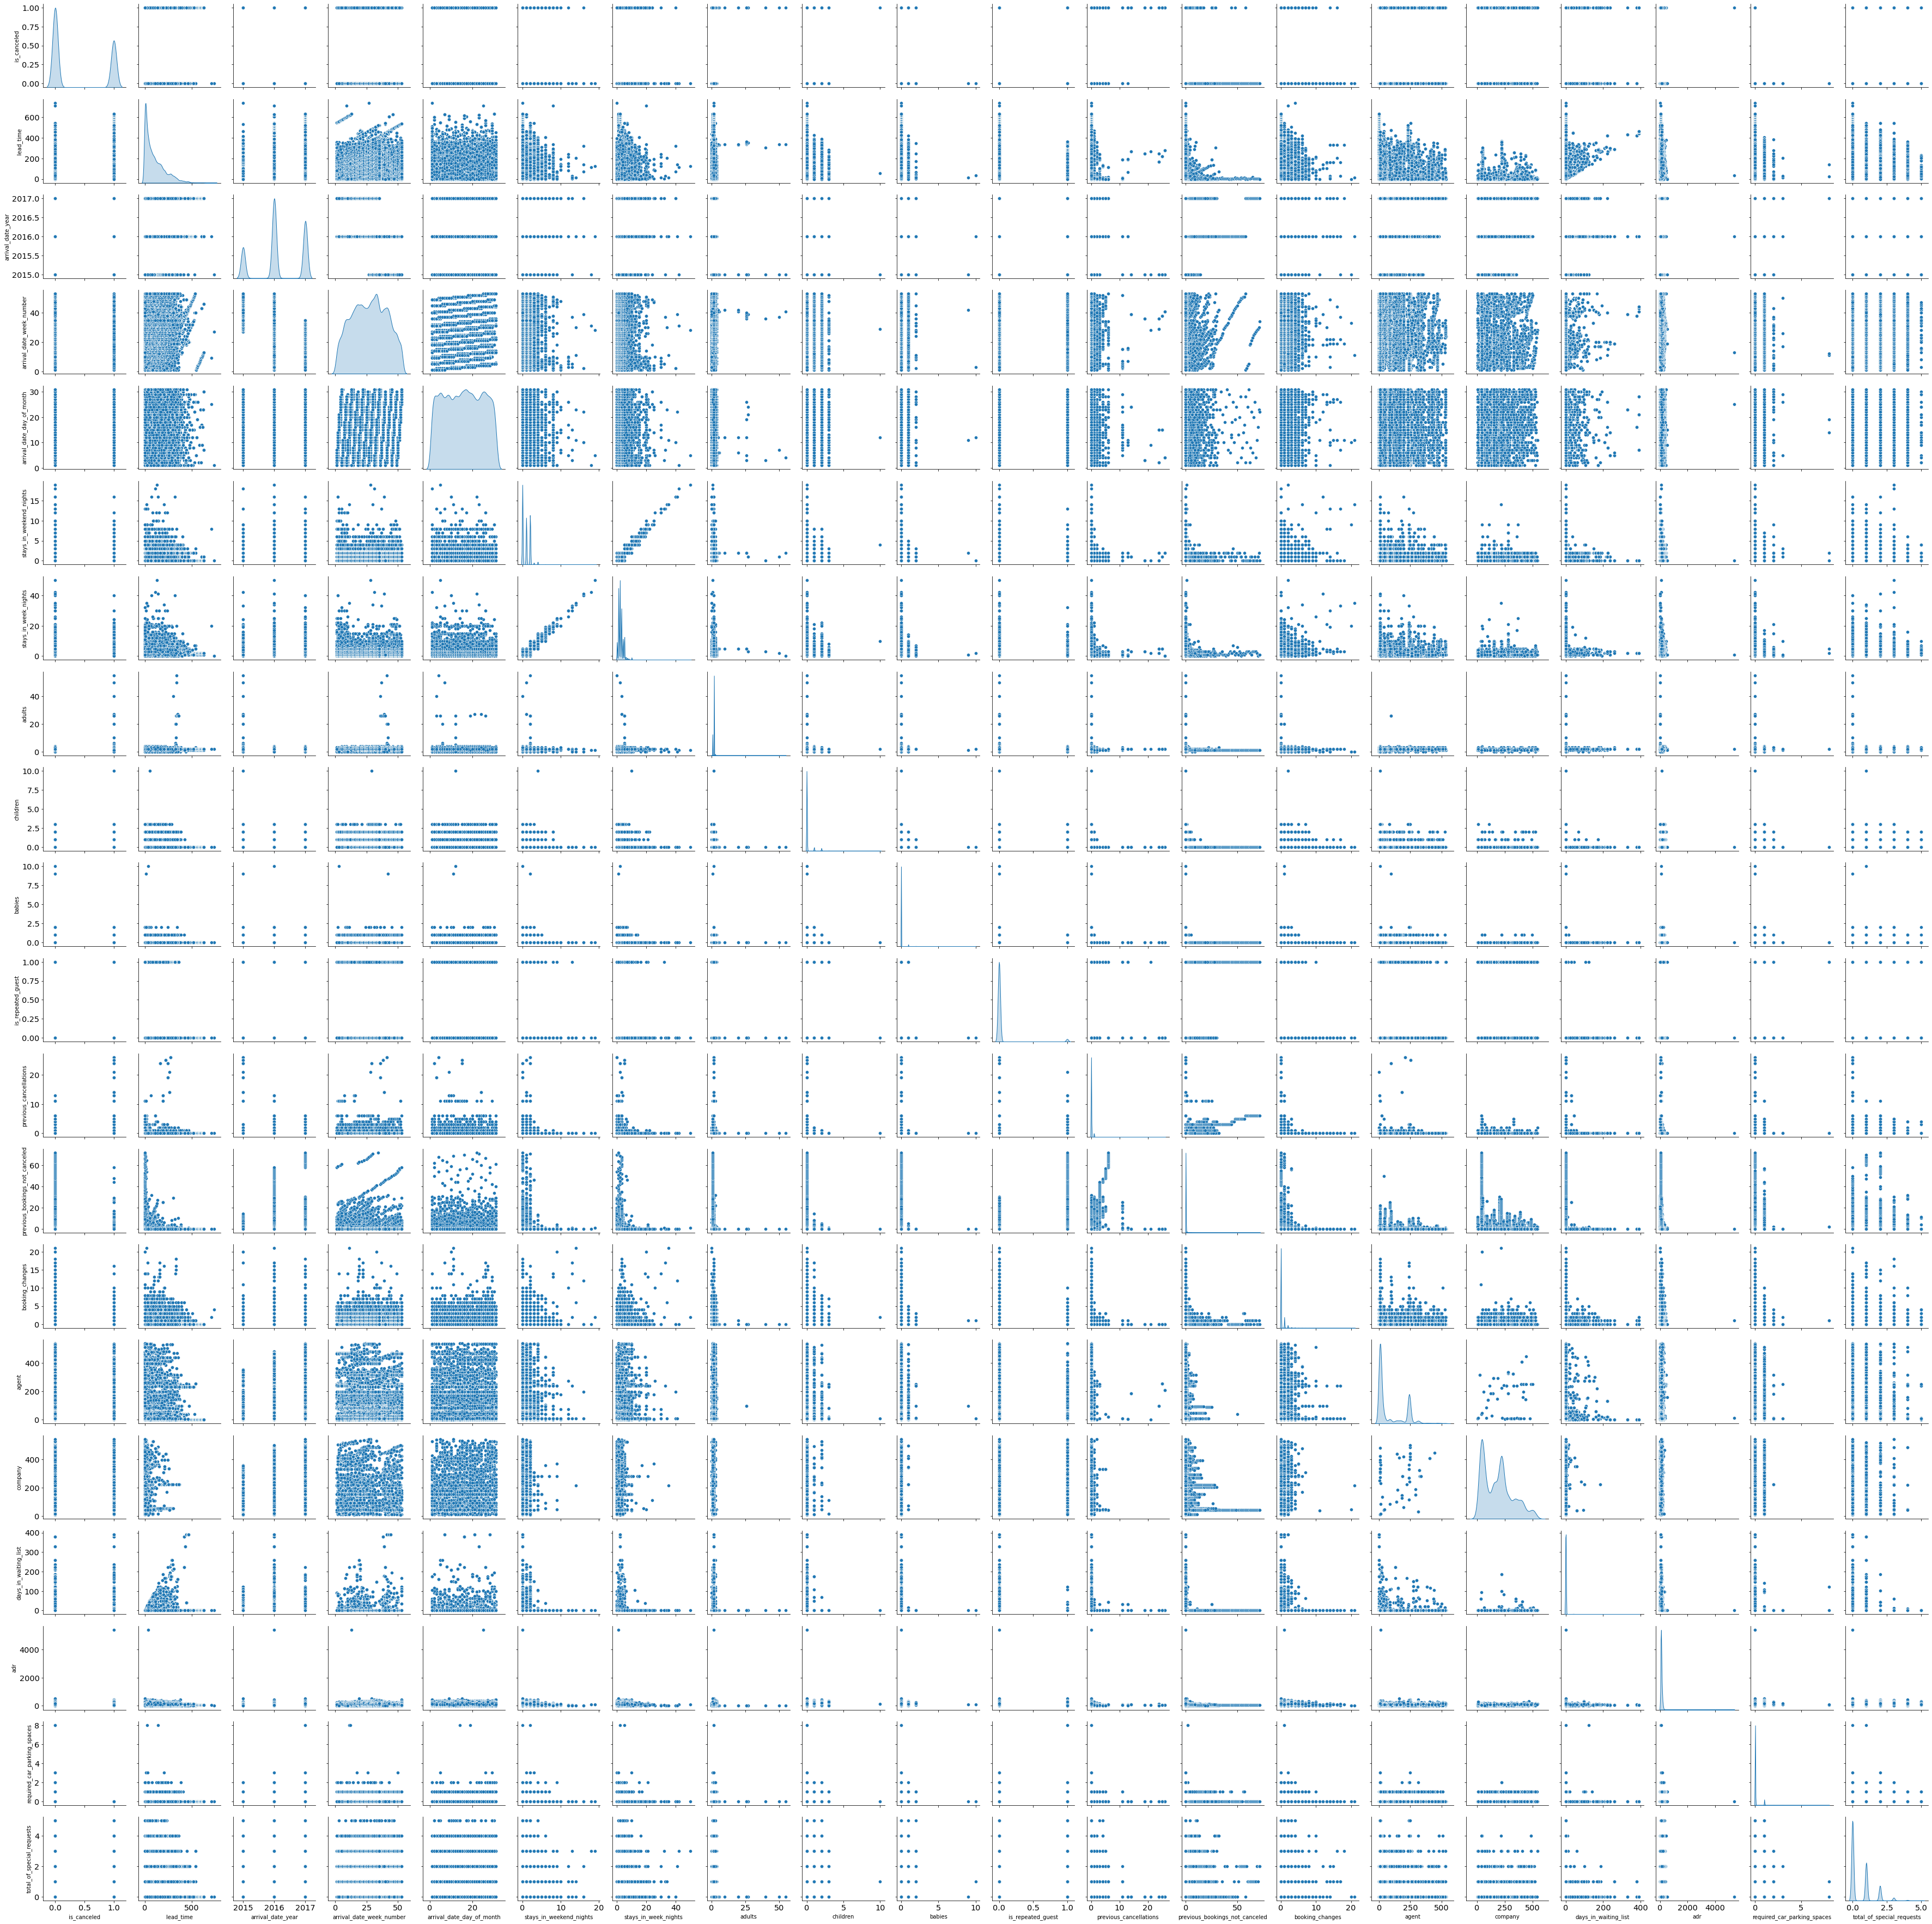

In [ ]:
#Pair Plot 
plt.figure(figsize=(15, 15))
sns.pairplot(df[numerical], diag_kind='kde')
plt.show()

Setelah dibentuk pair plot dengan hue `is_canceled`, fitur yang menunjukkan pattern yang cukup jelas:

- `stays_in_weekend_nights` & `stays_in_week_nights`

Terdapat korelasi positif antara `stays_in_weekend_nights` & `stays_in_week_nights`. Namun korelasi ini tidak menunjukkan sebuah kausalitas.

Selain dua fitur tersebut tidak terlihat cluster terpisah yang menandakan fitur saling berkorelasi.
- Tidak ditemukan korelasi positif maupun negatif dengan feature target (is_cancelled)

## **Business Insight**

In [ ]:
df_insight = df.copy()

### **Lead Time and Cancellation**

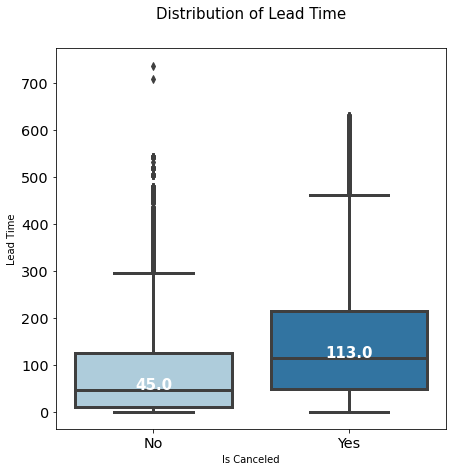

In [ ]:
plt.figure(figsize=(7, 7))
lead_time_ax = sns.boxplot(x='is_canceled', y='lead_time', data=df_insight, palette='Paired')
lead_time_ax.set_xticklabels(['No', 'Yes'])
plt.ylabel('Lead Time', fontsize=10)
plt.xlabel('Is Canceled', fontsize=10)
plt.title('Distribution of Lead Time', fontsize=15, pad=30)
medians = df_insight.groupby(['is_canceled'])['lead_time'].median()
vertical_offset = df_insight['lead_time'].median() * 0.05
for xtick in lead_time_ax.get_xticks():
    lead_time_ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',fontsize=15,color='w',weight='semibold')

plt.show()

Insight :
*   Semakin lama lead time, semakin besar kemungkinan pelanggan akan membatalkan pemesanan hotel
*   Jika jumlah hari antara saat pemesanan dibuat dan perkiraan tanggal kedatangan meningkat, kemungkinan pelanggan memiliki lebih banyak waktu untuk membatalkan reservasi dan lebih banyak waktu untuk keadaan tak terduga yang dapat membatalkan reservasi

Rekomendasi bisnis :

*   Hotel harus memberlakukan kebijakan untuk membatasi seberapa jauh hari pemesanan dapat dilakukan untuk mengurangi kemungkinan pembatalan


### **Previous Cancellations and Cancellation**

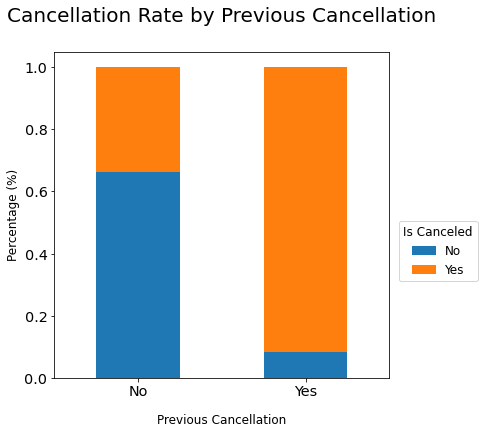

In [ ]:
# Previous Cancellations and Cancellation

#Change value for previous_cancellations to 0 and 1.
df_insight['previous_cancellations'] = df_insight['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)
df_insight['previous_cancellations'].value_counts()

#Visualization
previous_ax = pd.crosstab(df_insight['previous_cancellations'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(6,6))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

plt.title('Cancellation Rate by Previous Cancellation', fontsize=20, pad=30)   
previous_ax.set_xticklabels(['No','Yes'], rotation=360) 
plt.xlabel('Previous Cancellation', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

Insight :
*   Pelanggan yang telah membatalkan pemesanan hotel sebelumnya kemungkinan akan membatalkan lagi.


Rekomendasi bisnis : </br>
Memberikan promo kepada customer yang sering melakukan cancel pada booking sebelumnya supaya customer tidak melakukan cancel

### **Repeated Guest and Cancellation**

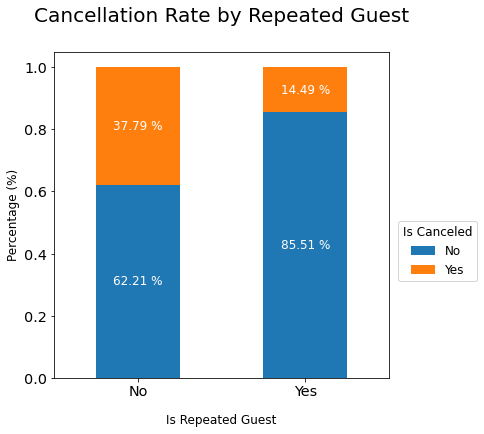

In [ ]:
# Repeated Guest and Cancellation

repeat_ax = pd.crosstab(df_insight['is_repeated_guest'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(6,6))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in repeat_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    repeat_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=12)

plt.title('Cancellation Rate by Repeated Guest', fontsize=20, pad=30)    
repeat_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Is Repeated Guest', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

Insight :
*   "*Repeated Guest*" diidentifikasi memiliki peluang pembatalan yang lebih rendah.

Rekomendasi bisnis : </br>
hotel dapat menerapkan Kebijakan untuk memberi insentif (bonus/voucher,dll) & juga untuk meningkatkan lebih banyak "*Repeated Guest*" agar dapat kembali memesan kamar sehingga semakin bertambahnya tamu yang memesan ulang maka tingkat pembatalan pesanan tunggal semakin minim



# **Stage 2 - Preprocessing**

## **Handle missing values**

In [ ]:
#Checking Missing Values
df_clean.isnull().sum().sort_values(ascending=False)

NameError: ignored

In [ ]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

Ditemukan 4 kolom yang memiliki missing values:

*   company
*   agent
*   country
*   children

Treatment:

*   Kolom `children` karena hanya memiliki 4 baris data yang kosong maka missing value tersebut akan di hapus
*   Kolom `agent` karena merupakan ID maka nilai akan di set 0 untuk data yang tidak memiliki ID dan 1 untuk data yang memiliki ID.
*   Kolom `company` karena banyak missing value (94%) maka feature `company` dapat di drop
*   Kolom `country` karena sebagian besar nilainya adalah PRT dan missing value rationya kecil, maka missing value tersebut akan diisi dengan nilai PRT


In [ ]:
#Remove rows that have no children data
df_clean.dropna(subset=['children'], inplace=True)

In [ ]:
#Change value agent to 0 and 1
df_clean['agent'] = df_clean['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['agent'].value_counts()

In [ ]:
df_clean.shape

In [ ]:
#Drop feature company
df_clean.drop(columns=['company'], inplace = True)
df_clean.shape

In [ ]:
#Fill NaN value in country with the value of mode
df_clean['country'].fillna(df_clean['country'].mode()[0], inplace = True)
df_clean['country'].value_counts()

In [ ]:
df_clean.isna().sum()

## **Handle duplicated data**

In [ ]:
df_clean.duplicated().sum()

0

In [ ]:
df_clean.duplicated(subset=['name', 'email', 'phone-number', 'credit_card']).sum()

0

Tidak ditemukan adanya duplicated values

## **Handle outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

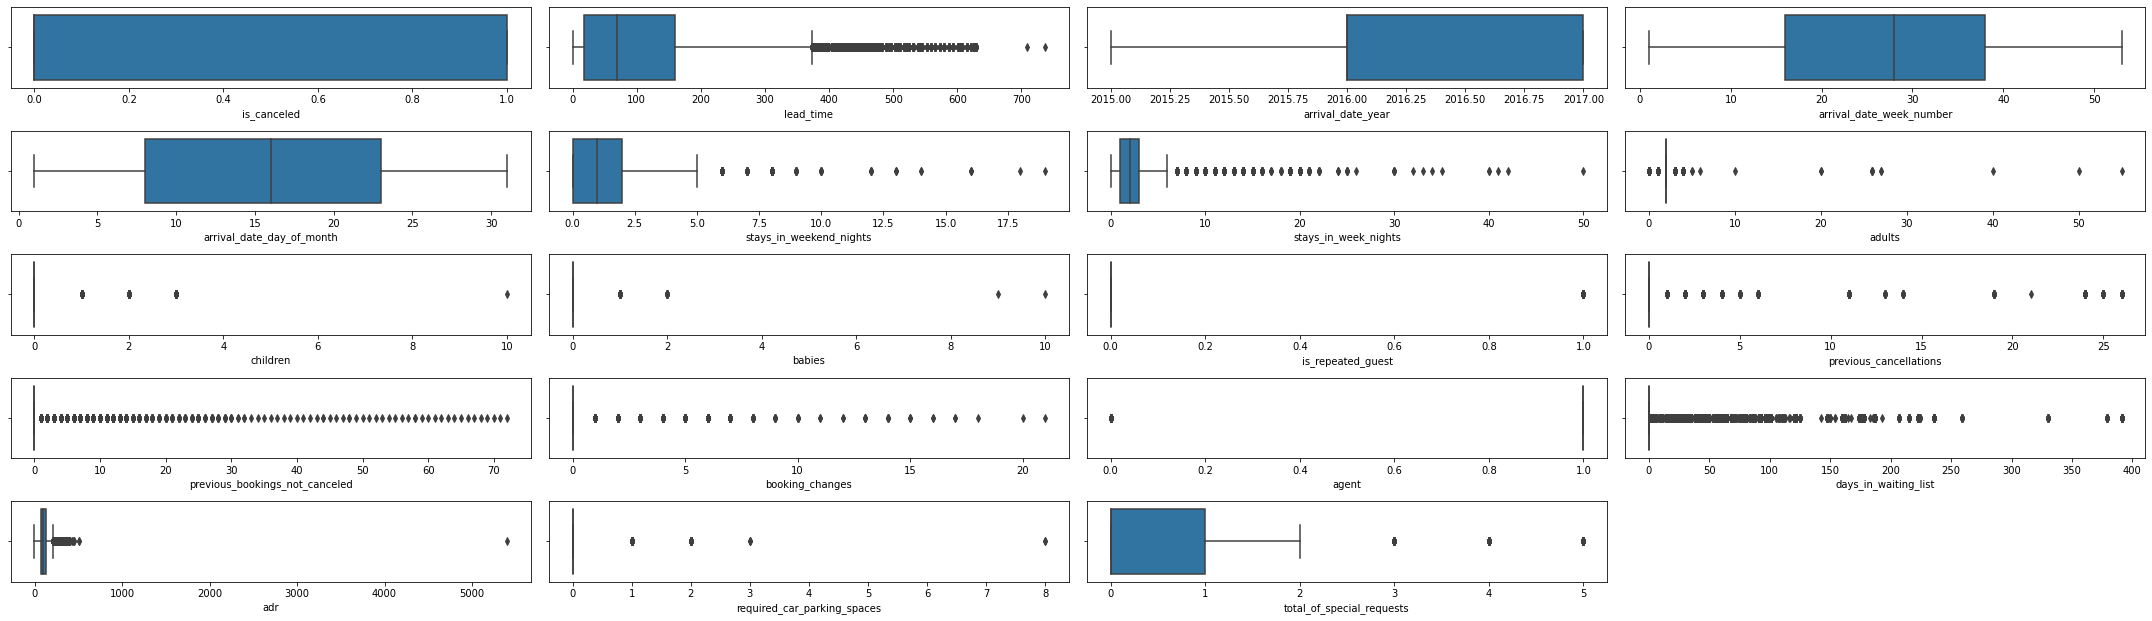

In [ ]:
plt.figure(figsize = (30, 10))
x = 1 

for column in df_clean.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df_clean[column])
    x+=1
    
plt.tight_layout()


*   Dapat terlihat jika dalam data ini memiliki banyak outliers
*   Dalam hal ini kami akan menangani outlier seperti keterangan di bawah


### **Lead Time Feature**

In [ ]:
#Cek nilai outlier
Q1 = df_clean['lead_time'].quantile(0.25)
Q3 = df_clean['lead_time'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-195.0, 373.0, 18.0, 160.0)

In [ ]:
df_clean.loc[(df_clean.lead_time > high_limit,'lead_time')] = high_limit
#Karena lead time dibatasi hanya 1 tahun

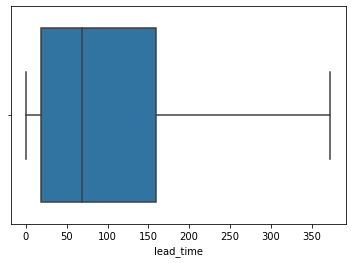

In [ ]:
sns.boxplot(x = df_clean.lead_time)

### **Stays in Weekend Nights**

In [ ]:
#Cek nilai Oulier
Q1 = df_clean['stays_in_weekend_nights'].quantile(0.25)
Q3 = df_clean['stays_in_weekend_nights'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-3.0, 5.0, 0.0, 2.0)

In [ ]:
df_clean.stays_in_weekend_nights.value_counts()

0     51996
2     33307
1     30625
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
df_clean.loc[(df_clean.stays_in_weekend_nights > high_limit,'stays_in_weekend_nights')] = 2.0
#Karena kita anggap customer paling banyak stay 2 hari (modus = 0 diabaikan)

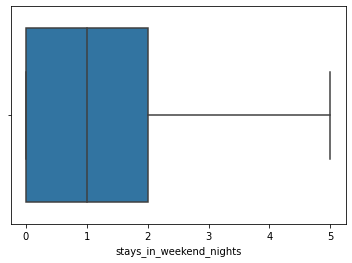

In [ ]:
sns.boxplot(x = df_clean.stays_in_weekend_nights)

### **Stays in Week Nights**

In [ ]:
Q1 = df_clean['stays_in_week_nights'].quantile(0.25)
Q3 = df_clean['stays_in_week_nights'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-2.0, 6.0, 1.0, 3.0)

In [ ]:
df_clean.stays_in_week_nights.value_counts()

2     33682
1     30310
3     22258
5     11076
4      9563
0      7644
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

In [ ]:
df_clean.loc[(df_clean.stays_in_week_nights > high_limit,'stays_in_week_nights')] = 2.0
#Karena kita anggap customer paling banyak stay 2 hari 

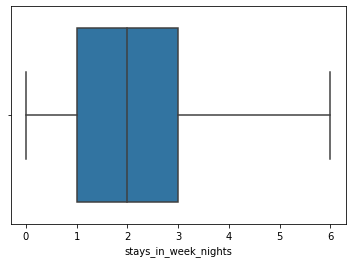

In [ ]:
sns.boxplot(x = df_clean.stays_in_week_nights)

### **Adults**

In [ ]:
Q1 = df_clean['adults'].quantile(0.25)
Q3 = df_clean['adults'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
df_clean.adults.value_counts()

2     89677
1     23027
3      6201
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [ ]:
#Karena ada nilai 0 (Customer tidak boleh anak kecil atau babies maka nilai 0 diganti 1
df_clean.loc[(df_clean.adults == 0,'adults')] = 1

In [ ]:
df_clean.adults.value_counts()

2     89677
1     23430
3      6201
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

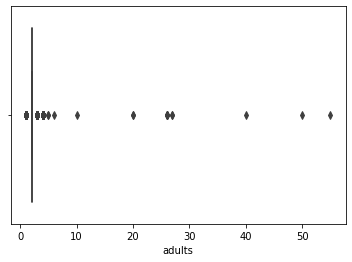

In [ ]:
sns.boxplot(x = df_clean.adults)

### **Children**

In [ ]:
Q1 = df_clean['children'].quantile(0.25)
Q3 = df_clean['children'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df_clean.loc[(df_clean.children ==10,'children')] = 3
#Karena kita anggap 10 anak case yg sangat spesial

In [ ]:
df_clean.children.value_counts()

0.0    110796
1.0      4861
2.0      3652
3.0        77
Name: children, dtype: int64

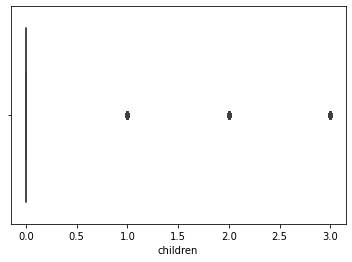

In [ ]:
sns.boxplot(x = df_clean.children)

### **Babies**

In [ ]:
Q1 = df_clean['babies'].quantile(0.25)
Q3 = df_clean['babies'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.babies.value_counts()

0     118469
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [ ]:
df_clean.loc[(df_clean.babies > 5,'babies')] = 2
#Karena kita anggap babies > 5 case spesial

In [ ]:
df_clean.babies.value_counts()

0    118469
1       900
2        17
Name: babies, dtype: int64

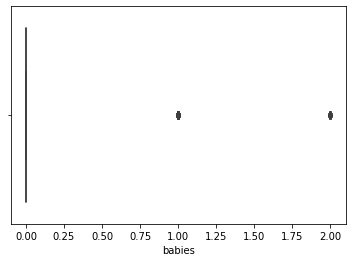

In [ ]:
sns.boxplot(x = df_clean.babies)

### **Previous Cancellations**

In [ ]:
Q1 = df_clean['previous_cancellations'].quantile(0.25)
Q3 = df_clean['previous_cancellations'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.previous_cancellations.value_counts()

0     112902
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [ ]:
df_clean.loc[(df_clean.previous_cancellations > 0,'previous_cancellations')] = 1
#Karena kita bagi hanya 2 keadaan pernah cancel atau tidak

In [ ]:
df_clean.previous_cancellations.value_counts()

0    112902
1      6484
Name: previous_cancellations, dtype: int64

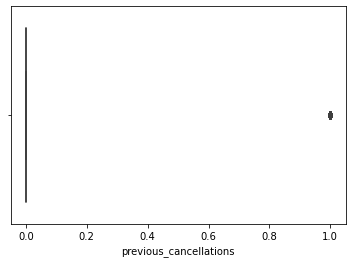

In [ ]:
sns.boxplot(x = df_clean.previous_cancellations)

### **Previous Bookings Not Cancelled**

In [ ]:
Q1 = df_clean['previous_bookings_not_canceled'].quantile(0.25)
Q3 = df_clean['previous_bookings_not_canceled'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.previous_bookings_not_canceled.value_counts()

0     115766
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [ ]:
df_clean.loc[(df_clean.previous_bookings_not_canceled > 0,'previous_bookings_not_canceled')] = 1
#Karena kita bagi hanya 2 keadaan pernah cancel atau tidak

In [ ]:
df_clean.previous_bookings_not_canceled.value_counts()

0    115766
1      3620
Name: previous_bookings_not_canceled, dtype: int64

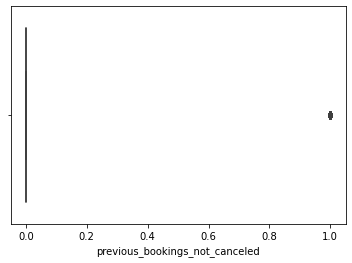

In [ ]:
sns.boxplot(x = df_clean.previous_bookings_not_canceled)

### **Booking Changes**

In [ ]:
Q1 = df_clean['booking_changes'].quantile(0.25)
Q3 = df_clean['booking_changes'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.booking_changes.value_counts()

0     101310
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [ ]:
df_clean.loc[(df_clean.booking_changes > 0,'booking_changes')] = 1
#Karena kita bagi hanya 2 keadaan pernah booking change atau tidak

In [ ]:
df_clean.booking_changes.value_counts()

0    101310
1     18076
Name: booking_changes, dtype: int64

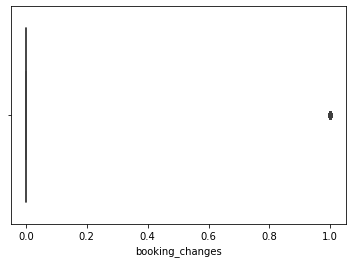

In [ ]:
sns.boxplot(x = df_clean.booking_changes)

### **Days in Waiting List**

In [ ]:
Q1 = df_clean['days_in_waiting_list'].quantile(0.25)
Q3 = df_clean['days_in_waiting_list'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.days_in_waiting_list.value_counts()

0      115688
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [ ]:
df_clean.loc[(df_clean.days_in_waiting_list > 1,'days_in_waiting_list')] = 1
#Karena kita bagi hanya 2 keadaan waiting list atau tidak

In [ ]:
df_clean.days_in_waiting_list.value_counts()

0    115688
1      3698
Name: days_in_waiting_list, dtype: int64

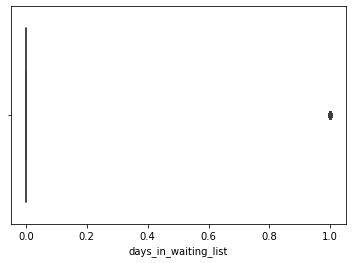

In [ ]:
sns.boxplot(x = df_clean.days_in_waiting_list)

### **ADR**

In [ ]:
Q1 = df_clean['adr'].quantile(0.25)
Q3 = df_clean['adr'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-15.774999999999991, 211.065, 69.29, 126.0)

In [ ]:
df_clean.loc[(df_clean.adr > high_limit,'adr')] = high_limit

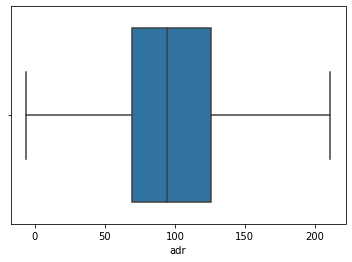

In [ ]:
sns.boxplot(x = df_clean.adr)

### **Required Car Parking Spaces**

In [ ]:
Q1 = df_clean['required_car_parking_spaces'].quantile(0.25)
Q3 = df_clean['required_car_parking_spaces'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.required_car_parking_spaces.value_counts()

0    111970
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [ ]:
df_clean.loc[(df_clean.required_car_parking_spaces > 1,'required_car_parking_spaces')] = 1
#Karena kita bagi hanya 2 keadaan butuh parkir atau tidak

In [ ]:
df_clean.required_car_parking_spaces.value_counts()

0    111970
1      7416
Name: required_car_parking_spaces, dtype: int64

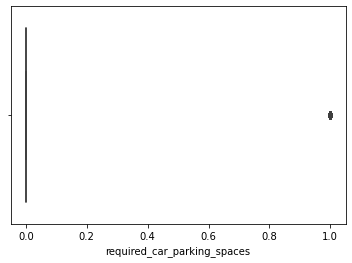

In [ ]:
sns.boxplot(x = df_clean.required_car_parking_spaces)

### **Total of Special Requests**

In [ ]:
Q1 = df_clean['total_of_special_requests'].quantile(0.25)
Q3 = df_clean['total_of_special_requests'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-1.5, 2.5, 0.0, 1.0)

In [ ]:
df_clean.total_of_special_requests.value_counts()

0    70318
1    33223
2    12968
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [ ]:
df_clean.loc[(df_clean.total_of_special_requests > high_limit,'total_of_special_requests')] = 2
#Karena nilai high limit adalah pecahan maka outlier kita jadikan angka terdekat

In [ ]:
df_clean.total_of_special_requests.value_counts()

0    70318
1    33223
2    15845
Name: total_of_special_requests, dtype: int64

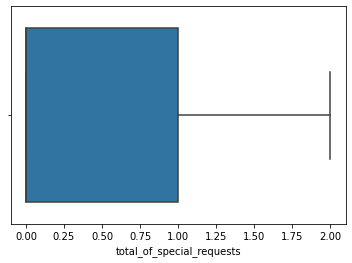

In [ ]:
sns.boxplot(x = df_clean.total_of_special_requests)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

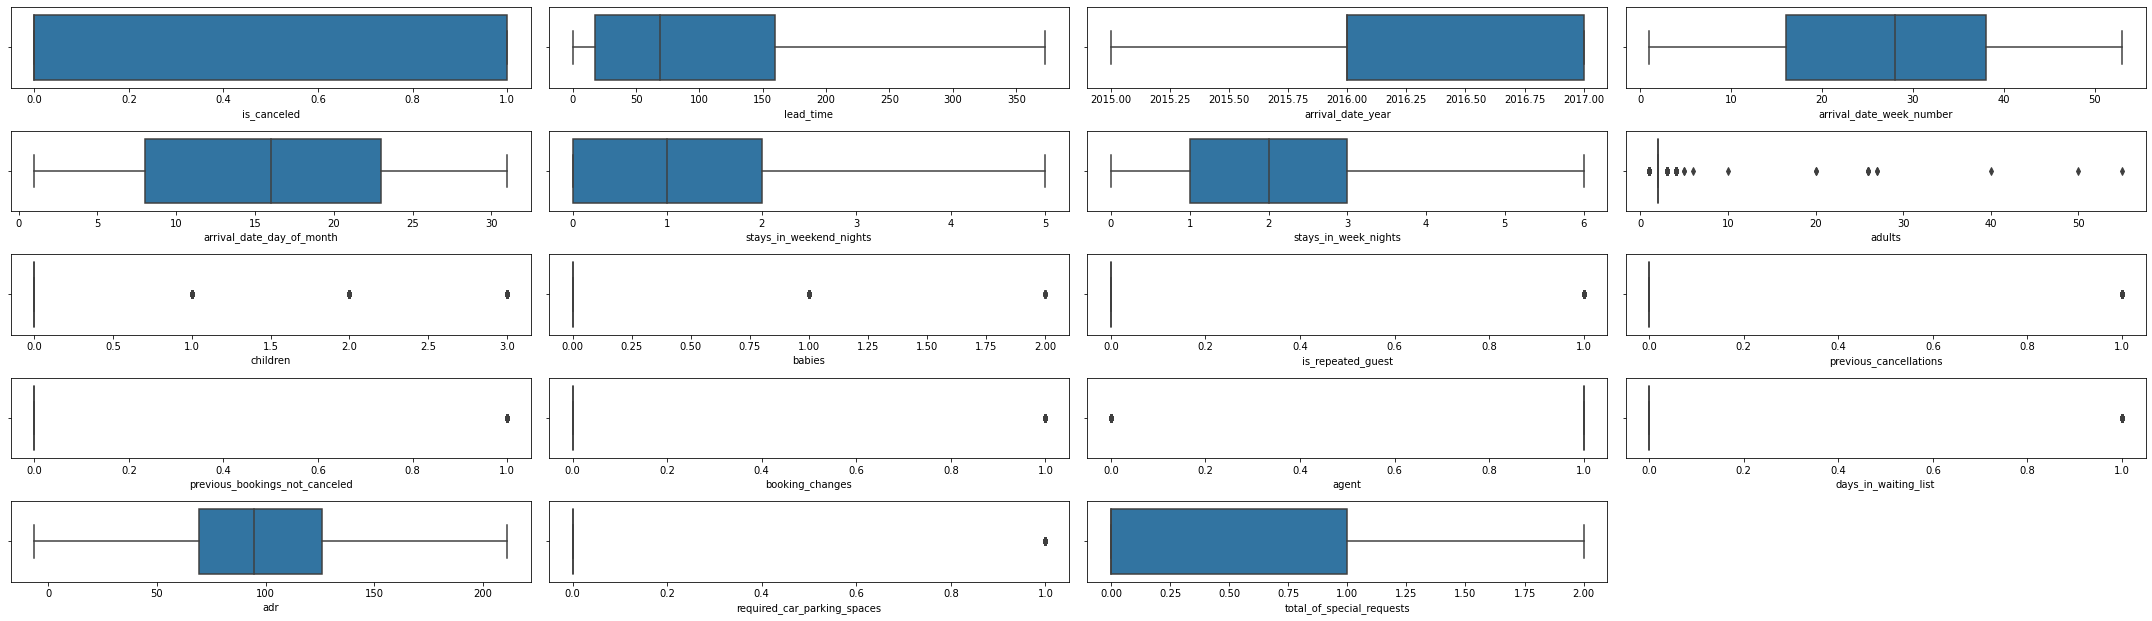

In [ ]:
plt.figure(figsize = (30, 10))
x = 1 

for column in df_clean.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df_clean[column])
    x+=1
    
plt.tight_layout()

## **Feature transformation**

**Normalization**

> Normalized/re-scale kolom numerical yang memiliki angka variance tinggi guna mempermudah interpretasi beberapa model ML



In [ ]:
df_clean.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


is_canceled                           0.233205
lead_time                         10233.142643
arrival_date_year                     0.500494
arrival_date_week_number            185.105119
arrival_date_day_of_month            77.102158
stays_in_weekend_nights               0.902301
stays_in_week_nights                  1.966724
adults                                0.326374
children                              0.158101
babies                                0.008047
is_repeated_guest                     0.030895
previous_cancellations                0.051362
previous_bookings_not_canceled        0.029403
booking_changes                       0.128485
agent                                 0.118123
days_in_waiting_list                  0.030016
adr                                1996.974979
required_car_parking_spaces           0.058260
total_of_special_requests             0.513534
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_clean['lead_time_norm'] = MinMaxScaler().fit_transform(df_clean['lead_time'].values.reshape(len(df_clean), 1))
df_clean['arrival_date_week_number_norm'] = MinMaxScaler().fit_transform(df_clean['arrival_date_week_number'].values.reshape(len(df_clean), 1))
df_clean['arrival_date_day_of_month_norm'] = MinMaxScaler().fit_transform(df_clean['arrival_date_day_of_month'].values.reshape(len(df_clean), 1))
df_clean['adr_norm'] = MinMaxScaler().fit_transform(df_clean['adr'].values.reshape(len(df_clean), 1))

In [ ]:
df_clean[['lead_time_norm','arrival_date_week_number_norm','arrival_date_day_of_month_norm','adr_norm']].describe()

lead_time_norm  arrival_date_week_number_norm  \
count   119386.000000                  119386.000000   
mean         0.274082                       0.503173   
std          0.271204                       0.261641   
min          0.000000                       0.000000   
25%          0.048257                       0.288462   
50%          0.184987                       0.519231   
75%          0.428954                       0.711538   
max          1.000000                       1.000000   

       arrival_date_day_of_month_norm       adr_norm  
count                   119386.000000  119386.000000  
mean                         0.493285       0.492270  
std                          0.292693       0.205512  
min                          0.000000       0.000000  
25%                          0.233333       0.347996  
50%                          0.500000       0.464347  
75%                          0.733333       0.608798  
max                          1.000000       1.000000

## **Feature encoding**

Label encoding:

In [ ]:
#Label encoding

le = LabelEncoder()

columns = [
    'hotel',
    'reserved_room_type',
    'assigned_room_type'
]

for col in columns:
    df_clean[col] = le.fit_transform(df_clean[col])


In [ ]:
df_clean[['hotel', 'reserved_room_type','assigned_room_type']].head()

hotel  reserved_room_type  assigned_room_type
0      1                   2                   2
1      1                   2                   2
2      1                   0                   2
3      1                   0                   0
4      1                   0                   0

One hot encoding:

In [ ]:
for i in ['distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']:
    onehots = pd.get_dummies(df_clean[i], prefix=i)
    df_clean = df_clean.join(onehots)


In [ ]:
df_clean = df_clean.drop(columns=['distribution_channel', 'deposit_type', 'customer_type', 'reservation_status'], axis =1)
df_clean.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0      1            0        342               2015               July   
1      1            0        373               2015               July   
2      1            0          7               2015               July   
3      1            0         13               2015               July   
4      1            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   deposit_type_No Deposit  deposit_type_Non Refund deposit_type_Refundable  \
0                        1                        0                       0   
1                        1                        0                       0   
2                        1                        0                       0   
3                        1                        0                       0   
4                        1                        0                       0   

  customer_type_Contract customer_type_Group  customer_type_Transient  \
0                      0                   0                        1   
1                      0                   0                        1   
2                      0                   0                        1   
3                      0                   0                        1   
4                      0                   0                        1   

   customer_type_Transient-Party  reservation_status_Canceled  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   reservation_status_Check-Out  reservation_status_No-Show  
0                             1                           0  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  

[5 rows x 50 columns]

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  int64  
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

## **Handle class imbalance**

In [ ]:
df_clean['is_canceled'].value_counts()

0    75166
1    44220
Name: is_canceled, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


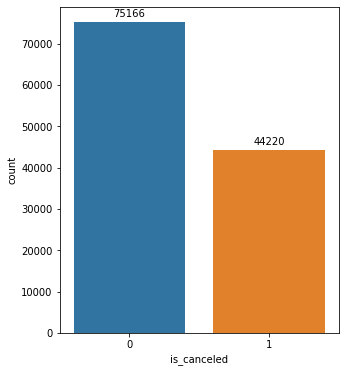

In [ ]:
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(df_clean['is_canceled'])

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

## **2. Feature Engineering**

## **Feature extraction (Add New Features)**


> **Total Stays**
</br>Dari kolom stays_in_weekend_nights dan stays_in_week_nights, kita bisa mendapatkan total jumlah hari menginap. Terlihat data `total stays` bernilai 0, hal ini memungkinkan sebab konsumen dapat check in dan checkout dihari yang sama



In [ ]:
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0      1            0        342               2015               July   
1      1            0        373               2015               July   
2      1            0          7               2015               July   
3      1            0         13               2015               July   
4      1            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   deposit_type_Non Refund  deposit_type_Refundable customer_type_Contract  \
0                        0                        0                      0   
1                        0                        0                      0   
2                        0                        0                      0   
3                        0                        0                      0   
4                        0                        0                      0   

  customer_type_Group customer_type_Transient  customer_type_Transient-Party  \
0                   0                       1                              0   
1                   0                       1                              0   
2                   0                       1                              0   
3                   0                       1                              0   
4                   0                       1                              0   

   reservation_status_Canceled  reservation_status_Check-Out  \
0                            0                             1   
1                            0                             1   
2                            0                             1   
3                            0                             1   
4                            0                             1   

   reservation_status_No-Show  total_stays  
0                           0            0  
1                           0            0  
2                           0            1  
3                           0            1  
4                           0            2  

[5 rows x 51 columns]


> **Total Guest**
</br>Dari kolom `adults, children and babies` kita bisa mendapatkan total jumlah orang yang menginap



In [ ]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0      1            0        342               2015               July   
1      1            0        373               2015               July   
2      1            0          7               2015               July   
3      1            0         13               2015               July   
4      1            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   deposit_type_Refundable  customer_type_Contract customer_type_Group  \
0                        0                       0                   0   
1                        0                       0                   0   
2                        0                       0                   0   
3                        0                       0                   0   
4                        0                       0                   0   

  customer_type_Transient customer_type_Transient-Party  \
0                       1                             0   
1                       1                             0   
2                       1                             0   
3                       1                             0   
4                       1                             0   

   reservation_status_Canceled  reservation_status_Check-Out  \
0                            0                             1   
1                            0                             1   
2                            0                             1   
3                            0                             1   
4                            0                             1   

   reservation_status_No-Show  total_stays  total_guests  
0                           0            0           2.0  
1                           0            0           2.0  
2                           0            1           1.0  
3                           0            1           1.0  
4                           0            2           2.0  

[5 rows x 52 columns]


> **Kids**
</br>Dari kolom `children and babies` kita bisa mendapatkan total jumlah anak yang menginap. Karena biasanya hanya ada kategori tamu dewasa dan anak (dibawah 17 tahun) dalam pemesanan kamar hotel



In [ ]:
df_clean['kids'] = df_clean['children'] + df_clean['babies']
df_clean.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0      1            0        342               2015               July   
1      1            0        373               2015               July   
2      1            0          7               2015               July   
3      1            0         13               2015               July   
4      1            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   customer_type_Contract  customer_type_Group customer_type_Transient  \
0                       0                    0                       1   
1                       0                    0                       1   
2                       0                    0                       1   
3                       0                    0                       1   
4                       0                    0                       1   

  customer_type_Transient-Party reservation_status_Canceled  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   reservation_status_Check-Out  reservation_status_No-Show  total_stays  \
0                             1                           0            0   
1                             1                           0            0   
2                             1                           0            1   
3                             1                           0            1   
4                             1                           0            2   

   total_guests  kids  
0           2.0   0.0  
1           2.0   0.0  
2           1.0   0.0  
3           1.0   0.0  
4           2.0   0.0  

[5 rows x 53 columns]

> **Guest Location**
</br>Karena kolom `country` memiliki data yang sangat besar, maka akan dikategorikan menjadi local & international. Pengkategorian mengacu pada lokasi hotel pada dataset yang berada di negara Portugal untuk penduduk local dan selain itu akan di kategorikan sebagai international

In [ ]:
df_clean['guest_location'] = df_clean['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_clean['guest_location'].value_counts()

International    70312
Local            49074
Name: guest_location, dtype: int64

> **Arrival Columns**
</br>Dari kolom ini akan digenerate kolom baru berdasrkan bulan dan hari 

> **Meal Columns**
</br>Dari kolom ini didapat data bernilai 'undentified'. Dari source dataset ini menyebutkan bahwa undentified sama dengan SC (no meal package), untuk itu kami akan mengganti nilai undentified menjadi SC

In [ ]:
df_clean['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df_clean['meal'].value_counts()

BB           92306
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
df_clean['meal'] = df_clean['meal'].str.replace('Undefined', 'SC')
df_clean['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

> **Distribution Channel**
</br>Dari kolom ini didapat data bernilai Undefined dan akan di ganti menjadi TA/TO yang merupakan nilai modus

> **Market Segment**
</br>Dari kolom ini didapat data bernilai Undefined dan akan di ganti menjadi online TA yang merupakan modus

In [ ]:
df_clean['market_segment'].value_counts()

Online TA        56476
Offline TA/TO    24219
Groups           19811
Direct           12605
Corporate         5295
Complementary      743
Aviation           237
Name: market_segment, dtype: int64

In [ ]:
df_clean['market_segment'] = df_clean['market_segment'].replace('Undefined', 'Online TA')
df_clean['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

## **Feature selection (Remove Irrelevant Features)**

In [ ]:
df_clean[['name', 'email', 'phone-number', 'credit_card']].head()

name                        email  phone-number       credit_card
0   Ernest Barnes  Ernest.Barnes31@outlook.com  669-792-1661  ************4322
1    Andrea Baker       Andrea_Baker94@aol.com  858-637-6955  ************9157
2  Rebecca Parker   Rebecca_Parker@comcast.net  652-885-2745  ************3734
3    Laura Murray            Laura_M@gmail.com  364-656-8427  ************5677
4     Linda Hines           LHines@verizon.com  713-226-5883  ************5498

In [ ]:
#Delete 'name', 'email', 'phone-number', 'credit_card' attributes
df_clean.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace=True)


Kolom `name, email, phone-number, credit_card` adalah kolom yang tidak memiliki pola, jadi kita dapat menghapus kolom tersebut

## **Feature selection (Remove Redundant Column)**

In [ ]:
#Delete 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', & 'babies'
df_clean.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies','adr','lead_time'], axis = 1, inplace=True)


*   Kolom `stays_in_weekend_nights` dan `stays_in_week_nights` dihapus karena sudah ada kolom `total_stays`
*   Kolom `children` dan `babies` dihapus karena sudah ada kolom `kids`

Apakah kolom yang sudah di transformasi bisa ikut dihapus?

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  int64  
 1   is_canceled                     119386 non-null  int64  
 2   arrival_date_year               119386 non-null  int64  
 3   arrival_date_month              119386 non-null  object 
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   adults                          119386 non-null  int64  
 7   meal                            119386 non-null  object 
 8   country                         119386 non-null  object 
 9   market_segment                  119386 non-null  object 
 10  is_repeated_guest               119386 non-null  int64  
 11  previous_cancellations          119386 non-null  int64  
 12  previous_booking

## **Feature Tambahan**

*   Creating two dataframes, Split data Resort Hotel & City Hotel
*   Creating new feature: `Weekday vs Weekend` 
*   Creating new feature: `Summer vs Winter` 




*  **Customer Satisfaction Rate (Rating)**: 
Fitur ini perlu ditambahkan karena dapat digunakan untuk menilai kinerja pelayanan hotel dan mungkin saja berpengaruh terhadap cancellation rate. Hipotesis dari kami adalah semakin tinggi rating yang diberikan kepada hotel, maka akan semakin rendah cancellation rate.
*  **Total Revenue:** Pada Dataset hanya disajikan data mengenai Average Daily Rate (ADR), yang didapatkan dari pendapatan kamar/kamar terisi. Fitur ini belum belum menggambarkan pengeluaran tiap customer per order. Total Revenue dapat digunakan untuk menganalisis efektifivitas pricing yang telah ditetapkan dan mungkin mungkin saja berpengaruh terhadap cancellation rate. 

*  **Reason For Staying:** Alasan seseorang melakukan pemesanan hotel diantaranya adalah Business Trip atau Holiday. Dengan mengetahui alasan tersebut, kedepannya dapat dibuat Marketing Campaign dengan bekerja sama dengan sebuah perusahaan atau tempat wisata di daerah setempat. Selain itu, kita juga akan mengetahui hubungan antara Reason For Staying dan Cancellation rate di hotel tersebut. 
*  **Reason For Cancelled:** Alasan seseorang melakukan pembatalan reservation hotel diantaranya adalah Change Mind, Find Better Hotel, Weather Issue, dan lain sebagainya. Faktor alasan pembatalan yang dikarenakan alasan pribadi customer dapat dimaklumi, namun jika alasan pembatalan karena find better hotel, diperlukan evaluasi kinerja ataupun fasilitas dari hotel tersebut dibandingkan dengan hotel competitor sekitar.

*  **Promotion Apply:** Dengan adanya fitur ini, dapat diketahui efektifitas promosi yang sedang dijalankan, sekaligus mengetahui apakah customer yang order dengan menggunakan promo, kemungkinan cancel nya akan lebih tinggi atau rendah. 







# **Stage 3 - Modelling**

## **Modelling**

In [ ]:
le = LabelEncoder()

columns = [
    'guest_location','meal','market_segment'
]

for col in columns:
    df_clean[col] = le.fit_transform(df_clean[col])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  int64  
 1   is_canceled                     119386 non-null  int64  
 2   arrival_date_year               119386 non-null  int64  
 3   arrival_date_month              119386 non-null  object 
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   adults                          119386 non-null  int64  
 7   meal                            119386 non-null  int64  
 8   country                         119386 non-null  object 
 9   market_segment                  119386 non-null  int64  
 10  is_repeated_guest               119386 non-null  int64  
 11  previous_cancellations          119386 non-null  int64  
 12  previous_booking

In [ ]:
df_clean.columns.tolist()

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'adults',
 'meal',
 'country',
 'market_segment',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'lead_time_norm',
 'arrival_date_week_number_norm',
 'arrival_date_day_of_month_norm',
 'adr_norm',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Contract',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'reservation_status_Canceled',
 'reservation_status_Check-Out',
 'reservation_statu

In [ ]:
cancel_corr = df_clean.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

reservation_status_Check-Out      1.000000
reservation_status_Canceled       0.978433
deposit_type_Non Refund           0.481488
deposit_type_No Deposit           0.477942
guest_location                    0.331560
lead_time_norm                    0.295229
previous_cancellations            0.270962
total_of_special_requests         0.242783
required_car_parking_spaces       0.197393
booking_changes                   0.186895
distribution_channel_TA/TO        0.176056
assigned_room_type                0.176025
distribution_channel_Direct       0.151609
hotel                             0.136505
customer_type_Transient           0.133170
reservation_status_No-Show        0.131760
customer_type_Transient-Party     0.124231
previous_bookings_not_canceled    0.115401
agent                             0.102122
days_in_waiting_list              0.099043
is_repeated_guest                 0.084788
distribution_channel_Corporate    0.075420
reserved_room_type                0.061284
adults     

In [ ]:
numerical = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()
numerical

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'adults',
 'meal',
 'market_segment',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'lead_time_norm',
 'arrival_date_week_number_norm',
 'arrival_date_day_of_month_norm',
 'adr_norm',
 'total_stays',
 'total_guests',
 'kids',
 'guest_location']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    pred = model.predict(xtest)
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.4f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Actually Not Canceled', 'Actually Canceled'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');

## **Split Data**

In [ ]:
# Split Feature and Label
X = df_clean[['hotel','adults','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','days_in_waiting_list',
 'required_car_parking_spaces','total_of_special_requests','lead_time_norm','adr_norm',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Contract',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party','total_stays',
 'total_guests','kids','arrival_date_year',
 'arrival_date_week_number_norm',
 'arrival_date_day_of_month_norm','guest_location','meal','market_segment',
]]

y = df_clean['is_canceled'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **LightGBM**

### **Model with default parameter**

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
# predict the results
y_pred=clf.predict(X_test)
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
eval_classification(clf, X_train, y_train, X_test, y_test)

LightGBM Model accuracy score: 0.8641
Accuracy (Test Set): 0.8641
Precision (Test Set): 0.8494
Recall (Test Set): 0.7716
F1-Score (Test Set): 0.8086
AUC: 0.9417


hasil akurasi model jika menggunakan data train

In [ ]:
# compare train and test set accuracy
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8709


membandingkan hasil akurasi model jika menggunakan data train dan data tes

In [ ]:
# check for overfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8709
Test set score: 0.8641


### **Hyperparameter tuning with optuna**

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
num_boost_rounds = 200

install packagenya terlebih dahulu

In [ ]:
# hyperparameter tuning framework
%pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 14.0 MB/s 
     |████████████████████████████████| 209 kB 55.0 MB/s 
     |████████████████████████████████| 81 kB 10.2 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 112 kB 58.2 MB/s 
     |████████████████████████████████| 147 kB 57.8 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=4d64dfefd832645a4efc44e9846a98774311b2484630bce2d8a8b94ca3effec6
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


mencoba hyperparameter tuning dengan parameter objective, metric, num_boost_round, dan learning rate. nanti optuna akan mencoba coba kombinasi parameter yang tepat dan melakukan trial sejumlah yang kita masukkan (disini n_trial yang digunakan 100).

In [ ]:
import optuna

def objective_lgbm(trial):
    
    param = {
        'objective': 'binary',
        'metric': 'accuracy_score',
        'num_leaves': trial.suggest_int('num_leaves', 10,300),
        'num_boost_rounds': trial.suggest_int('num_boost_rounds', 100,400),
        'learning_rate': trial.suggest_float('learning_rate', 0.1,1),
        'max_depth': trial.suggest_int('max_depth', 1,200),
        'colsample_bytree': trial.suggest_float('colsample_bytree',0.1,1),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        #"feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        #"bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
    }
    
    LightGBM_Manual = lgb.train(param, train_data, num_boost_rounds)
    preds=LightGBM_Manual.predict(X_test)
    pred_labels = np.rint(preds)
    precision = round(precision_score(y_test, pred_labels),4)
    return precision
    
study_lgbm = optuna.create_study(direction='maximize',study_name="LGBM")
study_lgbm.optimize(objective_lgbm, n_trials=100)

[I 2022-09-02 14:12:27,321] A new study created in memory with name: LGBM
[I 2022-09-02 14:12:29,235] Trial 0 finished with value: 0.8534 and parameters: {'num_leaves': 19, 'num_boost_rounds': 363, 'learning_rate': 0.41150061666081106, 'max_depth': 16, 'colsample_bytree': 0.5974267440058462, 'lambda_l1': 0.008276656009590098, 'lambda_l2': 2.2421990043186723e-08}. Best is trial 0 with value: 0.8534.
[I 2022-09-02 14:12:32,128] Trial 1 finished with value: 0.8489 and parameters: {'num_leaves': 137, 'num_boost_rounds': 132, 'learning_rate': 0.44293044686669103, 'max_depth': 158, 'colsample_bytree': 0.18537290516498273, 'lambda_l1': 0.24468252428022977, 'lambda_l2': 0.06997647009040392}. Best is trial 0 with value: 0.8534.
[I 2022-09-02 14:12:36,431] Trial 2 finished with value: 0.8568 and parameters: {'num_leaves': 182, 'num_boost_rounds': 211, 'learning_rate': 0.3523888842279349, 'max_depth': 82, 'colsample_bytree': 0.9294642353439446, 'lambda_l1': 0.014163822603631518, 'lambda_l2': 5.29

dari proses hyperparameter tuning dengan optima kita bisa melihat parameter apa saja yang dapat digunakan untuk mendapatkan hasil akurasi terbaik

In [ ]:
trial_lgbm = study_lgbm.best_trial
print("Model Precision --> ",trial_lgbm.value)
print("Model's Best parameters --> ",trial_lgbm.params)

Model Precision -->  0.8742
Model's Best parameters -->  {'num_leaves': 271, 'num_boost_rounds': 121, 'learning_rate': 0.10227350866234339, 'max_depth': 166, 'colsample_bytree': 0.14227616449793706, 'lambda_l1': 0.0025962510874327958, 'lambda_l2': 4.570333905728968}


In [ ]:
fit_param = {'num_leaves': 193, 'num_boost_rounds': 308, 'learning_rate': 0.10140227329013508, 'max_depth': 170, 'colsample_bytree': 0.11130197823405341, 'lambda_l1': 9.09913917652545e-05, 'lambda_l2': 0.05540676686608647}

membentuk model dengan best parameter

In [ ]:
# build the lightgbm model
model_LGBM = lgb.LGBMClassifier(**fit_param)
fit_model_LGBM = model_LGBM.fit(X_train,y_train)
pred_LGBM = fit_model_LGBM.predict(X_test)
accuracy=accuracy_score(y_test, pred_LGBM)
print('accuracy score (test): {0:0.4f}'.format(accuracy_score(y_test, pred_LGBM)))
precision=precision_score(y_test, pred_LGBM)
print('precision score (test): {0:0.4f}'.format(precision_score(y_test, pred_LGBM)))

accuracy score (test): 0.8219
precision score (test): 0.9049


In [ ]:
y_pred_train = fit_model_LGBM.predict(X_train)
print('accuracy score (train): {0:0.5f}'. format(accuracy_score(y_train, y_pred_train)))
print('precision score (train): {0:0.5f}'.format(precision_score(y_train, y_pred_train)))

accuracy score (train): 0.83129
precision score (train): 0.91627


In [ ]:
eval_classification(fit_model_LGBM , X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.8219
Precision (Test Set): 0.9049
Recall (Test Set): 0.5825
F1-Score (Test Set): 0.7088
AUC: 0.9068


In [ ]:
print(classification_report(y_test, pred_LGBM))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     22488
           1       0.90      0.58      0.71     13328

    accuracy                           0.82     35816
   macro avg       0.85      0.77      0.79     35816
weighted avg       0.84      0.82      0.81     35816



cek hasil akurasi model dengan data train dan test lagi untuk mengecek model tsb overfit atau tidak

In [ ]:
# check for overfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(fit_model_LGBM.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(fit_model_LGBM.score(X_test, y_test)))

Training set score: 0.8313
Test set score: 0.8219


### **Feature importance**

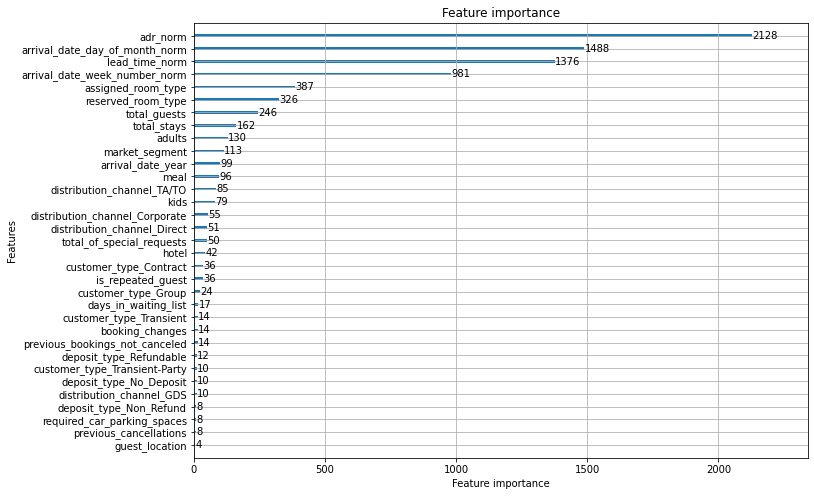

In [ ]:
ax = lgb.plot_importance(model_LGBM)
fig = ax.figure
fig.set_size_inches(11, 8)

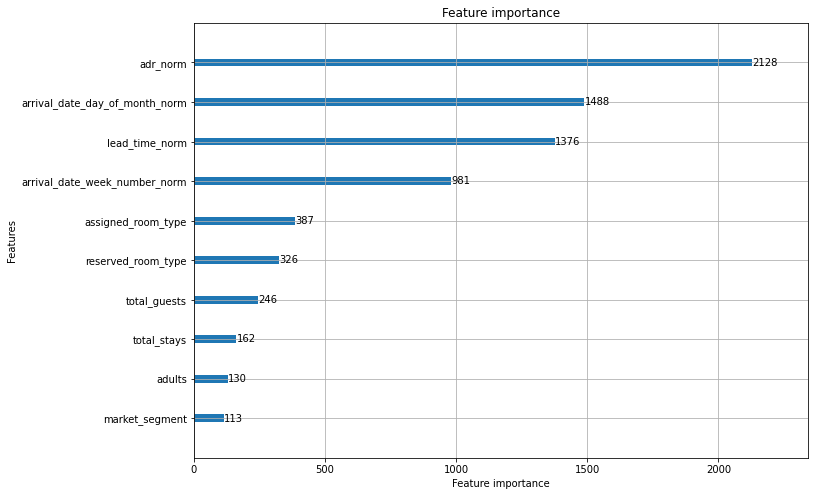

In [ ]:
ax = lgb.plot_importance(model_LGBM, max_num_features=10)
fig = ax.figure
fig.set_size_inches(11, 8)

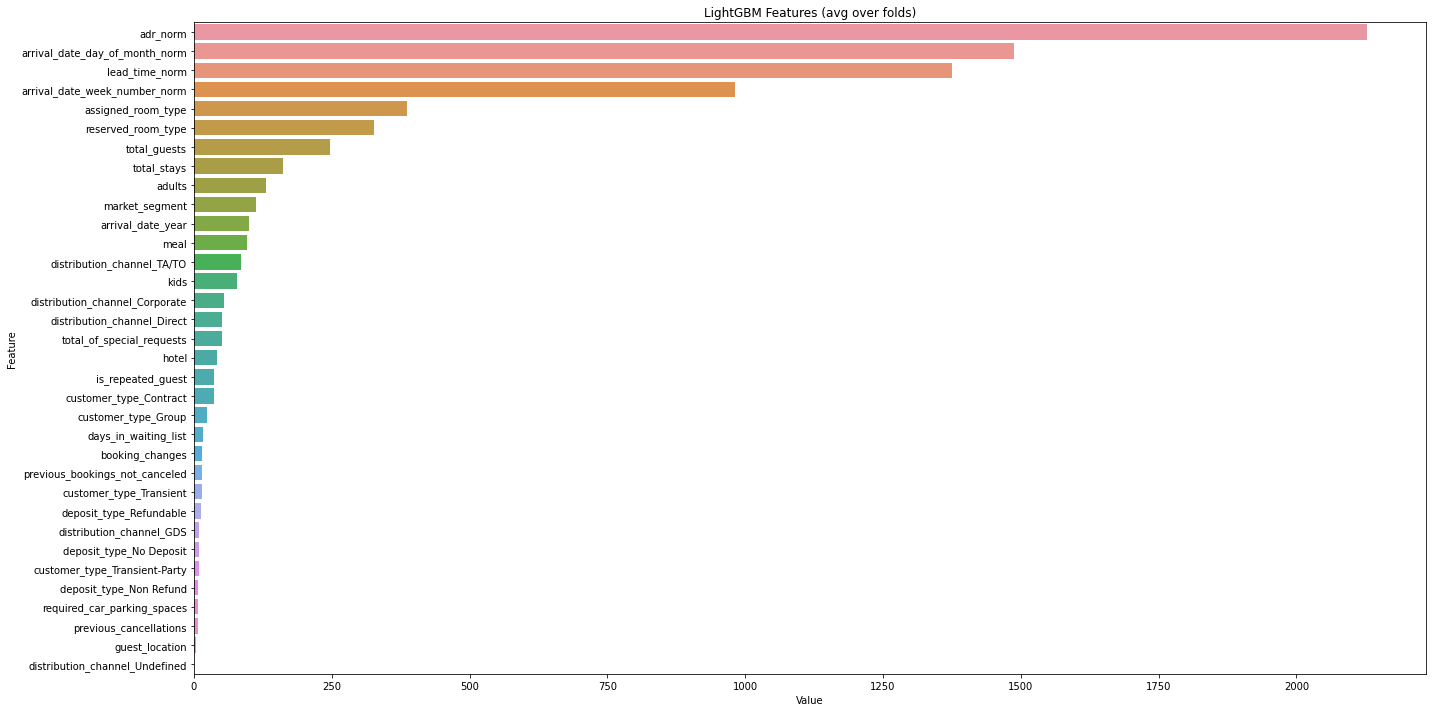

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(fit_model_LGBM.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

### **Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_LGBM)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21672   816]
 [ 5564  7764]]

True Positives(TP) =  21672

True Negatives(TN) =  7764

False Positives(FP) =  816

False Negatives(FN) =  5564


In [ ]:
def conf_matrix(label):
    confusion_mtx = confusion_matrix(y_test, pred_LGBM)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels=label, yticklabels=label)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

In [ ]:
label = ["0","1"]

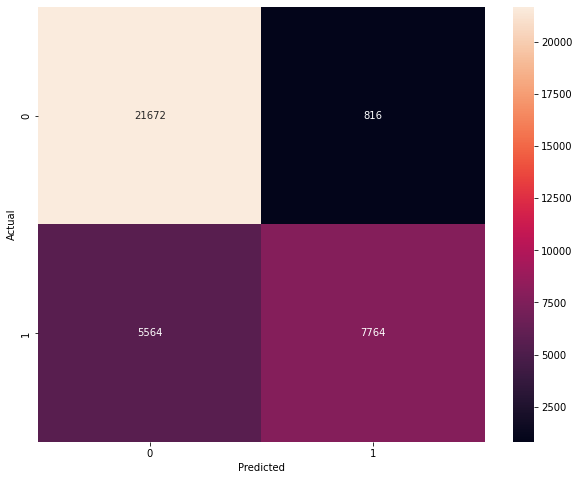

In [ ]:
conf_matrix(label)